In [250]:
import os
import tensorflow as tf
from sklearn.metrics import r2_score


In [251]:
# Get current working directory
cwd = os.getcwd()
print(cwd)

/Users/siddharthbhaduri/Desktop/Work/Fall-2017/Google-Project/Week9


In [252]:
# Library Import
get_ipython().magic('matplotlib inline')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import shutil

# import the train test split
from sklearn.model_selection import train_test_split

# List to store results
# Stores the performance on test set.
model_results = []
model_name = []

# In[413]:


xf = pd.read_csv('input_model_weighted_average.csv')
xf.head()
xf.iloc[168:172]




,Unnamed: 0,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,...,VIS_HIGH,VIS_AVG,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM
168,168,2000,JAN,60.098523,24.919939,-5.750129,50.876803,18.079444,-19.152746,100.000000,...,11.091680,8.231682,0.061922,28.491682,9.674976,0.769395,4.527847,7.865567,3.129778,0.388589
169,169,2000,FEB,53.769218,31.870521,5.378496,44.864486,25.930720,-0.570920,100.000000,...,11.091680,7.687676,0.044134,28.925880,9.571381,287.022956,3.572751,4.803434,2.284139,0.385381
170,170,2000,MAY,84.325735,62.360525,37.698853,68.870647,51.653895,25.975416,98.988685,...,11.091680,8.828890,0.570830,30.201699,9.129810,4.098408,10.428558,0.000000,1.610892,4.896486
171,171,2000,JUN,88.622913,69.307943,52.228400,71.995094,60.166479,45.635832,99.068140,...,11.229015,9.513896,0.408795,27.953090,8.176592,3.466575,9.051719,0.000000,1.014093,4.340215


In [253]:
p_update = pd.read_csv('IL_Corn_Price_Updated_1986_2016.csv')
p_update['Period'] = pd.Categorical(p_update['Period'], ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

p_update['Discounted_Value'] = p_update['Value'] /1.000248 
#ps
#Risk-free rate for 1986 - 2016 : 9.34% ( 30-year Treasury Constant Maturity Rate at 1986 )
# Monthly discount rate = 1/1.000248 

p_update = p_update[['Year', 'Period','Value', 'Discounted_Value']]
price_updated = p_update.dropna(axis=0, how='any')
#price_updated = p_update[p_update.Period != 'MARKETING YEAR']

price_updated = price_updated.sort_values(['Year', 'Period'])
price_updated = price_updated.reset_index(drop=True)
#price_updated.iloc[168:174]

price_updated = price_updated[~((price_updated.Year == 2000) & ((price_updated.Period == 'MAR') | (price_updated.Period == 'APR')))]
price_updated = price_updated.reset_index(drop=True)
price_updated.iloc[168:172]


xf['Price'] = price_updated['Value']
xf['Discounted_Price'] = price_updated['Discounted_Value']
xf['State'] = 'IL'

# Reorder State Column
cols = xf.columns.tolist()
#cols

cols.insert(1, cols.pop(cols.index('State')))

xf = xf.reindex(columns = cols)
#df.drop('Unnamed: 0', axis=1, inplace=True)

w_avg_model_scaled = xf
w_avg_model_scaled



,Unnamed: 0,State,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,...,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM,Price,Discounted_Price
0,0,IL,1986,JAN,55.953658,27.617217,-2.980925,42.880246,19.992262,-8.511984,...,0.186718,29.600197,11.077783,0.479003,2.544772,7.584738,9.707042,0.000000,2.35,2.349417
1,1,IL,1986,FEB,53.838886,28.731112,0.353638,46.537659,23.958440,-4.555208,...,0.109089,24.679482,9.622850,1.722515,5.510271,9.231277,15.203328,0.658457,2.38,2.379410
2,2,IL,1986,MAR,77.668458,41.937001,13.926317,51.205991,29.862688,2.748564,...,0.634101,36.374250,12.349509,15.116988,5.934169,3.868506,9.890731,1.055313,2.35,2.349417
3,3,IL,1986,ARP,85.651529,52.949283,25.351909,60.274139,37.049373,11.479874,...,0.474198,28.918771,10.770362,17.947352,9.195066,1.960945,7.611098,2.058521,2.34,2.339420
4,4,IL,1986,MAY,85.415668,62.338688,36.602102,61.467698,47.555928,27.795232,...,0.280723,33.072546,8.983943,15.212715,9.610446,0.327268,14.161837,4.663441,2.45,2.449393
5,5,IL,1986,JUN,93.180721,71.263159,47.746898,67.021368,55.502022,33.450048,...,0.950015,25.666101,8.317023,10.598875,8.135348,0.000000,12.649299,4.995009,2.45,2.449393
6,6,IL,1986,JUL,93.651100,75.325134,57.224505,71.740380,60.440695,41.882198,...,0.360831,30.924584,7.668664,11.201697,9.899297,0.000000,12.561325,6.286502,2.04,2.039494
7,7,IL,1986,AUG,88.032940,68.355756,43.240501,70.470204,53.535626,34.387899,...,0.123844,23.558382,6.839216,1.162475,6.987723,0.000000,11.848591,1.872076,1.77,1.769561
8,8,IL,1986,SEP,86.350515,66.418060,39.848014,66.092621,53.110278,30.557896,...,0.061922,31.473925,7.953490,6.651649,12.019534,0.109089,13.926898,5.663013,1.52,1.519623
9,9,IL,1986,OCT,74.910045,52.914618,29.721084,61.366736,42.196248,24.559025,...,0.103207,25.729013,7.975400,10.803140,9.754228,0.327268,16.250392,1.152677,1.39,1.389655


In [254]:
w_group = w_avg_model_scaled.groupby(["YEAR"])
year_list = w_avg_model_scaled["YEAR"].drop_duplicates()

for year in year_list:
    temp_df = w_group.get_group(year)
    #print(str(year) + ": " +str(len(temp_df["PRICE"].dropna())))

print(w_group.get_group(2000))


     Unnamed: 0 State  YEAR MONTH   TMP_HIGH    TMP_AVG    TMP_LOW    DP_HIGH  \
168         168    IL  2000   JAN  60.098523  24.919939  -5.750129  50.876803   
169         169    IL  2000   FEB  53.769218  31.870521   5.378496  44.864486   
170         170    IL  2000   MAY  84.325735  62.360525  37.698853  68.870647   
171         171    IL  2000   JUN  88.622913  69.307943  52.228400  71.995094   
172         172    IL  2000   JUL  87.461845  70.466481  51.066055  74.704992   
173         173    IL  2000   AUG  89.361775  71.781012  56.695409  74.533066   
174         174    IL  2000   SEP  90.167238  63.849101  36.705700  71.408262   
175         175    IL  2000   OCT  81.999760  54.605762  25.520160  62.377842   
176         176    IL  2000   NOV  74.379046  37.371940   9.233327  59.321373   
177         177    IL  2000   DEC  45.127840  19.968293  -7.283182  37.862855   

        DP_AVG     DP_LOW        ...          VIS_LOW  WIND_HIGH  WIND_AVG  \
168  18.079444 -19.152746     

In [255]:
# List to store results
# Stores the performance on test set.
model_results = []
#  Stores the name of model
model_name = []

# Making all column names UPPER CASE --> inline with the weather data file
w_avg_model_scaled.columns = map(str.upper, w_avg_model_scaled.columns)

# rename UNNAMED:0 to INDEX
w_avg_model_scaled.rename(columns={'UNNAMED: 0': 'INDEX'}, inplace=True)

# drop UNNAMED:0.1
w_avg_model_scaled = w_avg_model_scaled.drop('INDEX', axis=1)

w_avg_model_scaled.head()



,STATE,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,...,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM,PRICE,DISCOUNTED_PRICE
0,IL,1986,JAN,55.953658,27.617217,-2.980925,42.880246,19.992262,-8.511984,99.026800,...,0.186718,29.600197,11.077783,0.479003,2.544772,7.584738,9.707042,0.000000,2.35,2.349417
1,IL,1986,FEB,53.838886,28.731112,0.353638,46.537659,23.958440,-4.555208,99.510367,...,0.109089,24.679482,9.622850,1.722515,5.510271,9.231277,15.203328,0.658457,2.38,2.379410
2,IL,1986,MAR,77.668458,41.937001,13.926317,51.205991,29.862688,2.748564,99.138166,...,0.634101,36.374250,12.349509,15.116988,5.934169,3.868506,9.890731,1.055313,2.35,2.349417
3,IL,1986,ARP,85.651529,52.949283,25.351909,60.274139,37.049373,11.479874,99.558871,...,0.474198,28.918771,10.770362,17.947352,9.195066,1.960945,7.611098,2.058521,2.34,2.339420
4,IL,1986,MAY,85.415668,62.338688,36.602102,61.467698,47.555928,27.795232,95.246992,...,0.280723,33.072546,8.983943,15.212715,9.610446,0.327268,14.161837,4.663441,2.45,2.449393


In [256]:
w_avg_model_scaled.to_csv("final_input.csv")

In [257]:
col_names = list(w_avg_model_scaled)

# List all column types
#input_data.dtypes
print("Shape of Original data: {}".format(w_avg_model_scaled.shape) + "\n")

input_variables = w_avg_model_scaled.iloc[:,3:27]
print("Variables: " + str(input_variables.columns) + "\n")
print("Shape of variable data: {}".format(input_variables.shape) + "\n")

#print(input_data.iloc[:,26])
price = w_avg_model_scaled.iloc[:,25]
discounted_price = w_avg_model_scaled.iloc[:,26]



Shape of Original data: (370, 27)

Variables: Index(['TMP_HIGH', 'TMP_AVG', 'TMP_LOW', 'DP_HIGH', 'DP_AVG', 'DP_LOW',
       'HUM_HIGH', 'HUM_AVG', 'HUM_LOW', 'SEALVL_HIGH', 'SEALVL_AVG',
       'SEALVL_LOW', 'VIS_HIGH', 'VIS_AVG', 'VIS_LOW', 'WIND_HIGH', 'WIND_AVG',
       'PRECIP', 'NUMDAY_RAIN', 'NUM_DAYS_SNOW', 'NUM_DAYS_FOG',
       'NUM_DAYS_THNDRSTRM', 'PRICE', 'DISCOUNTED_PRICE'],
      dtype='object')

Shape of variable data: (370, 24)



In [258]:
lnn =  pd.read_csv('final_input.csv')
#rename UNNAMED:0 to INDEX
lnn.rename(columns={'Unnamed: 0': 'INDEX'}, inplace=True)

# drop UNNAMED:0.1
lnn = lnn.drop('INDEX', axis=1)
lnn.head()

,STATE,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,...,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM,PRICE,DISCOUNTED_PRICE
0,IL,1986,JAN,55.953658,27.617217,-2.980925,42.880246,19.992262,-8.511984,99.026800,...,0.186718,29.600197,11.077783,0.479003,2.544772,7.584738,9.707042,0.000000,2.35,2.349417
1,IL,1986,FEB,53.838886,28.731112,0.353638,46.537659,23.958440,-4.555208,99.510367,...,0.109089,24.679482,9.622850,1.722515,5.510271,9.231277,15.203328,0.658457,2.38,2.379410
2,IL,1986,MAR,77.668458,41.937001,13.926317,51.205991,29.862688,2.748564,99.138166,...,0.634101,36.374250,12.349509,15.116988,5.934169,3.868506,9.890731,1.055313,2.35,2.349417
3,IL,1986,ARP,85.651529,52.949283,25.351909,60.274139,37.049373,11.479874,99.558871,...,0.474198,28.918771,10.770362,17.947352,9.195066,1.960945,7.611098,2.058521,2.34,2.339420
4,IL,1986,MAY,85.415668,62.338688,36.602102,61.467698,47.555928,27.795232,95.246992,...,0.280723,33.072546,8.983943,15.212715,9.610446,0.327268,14.161837,4.663441,2.45,2.449393


In [259]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error, mean_absolute_error
from lstm_predictior_updated import lstm_model
#from lstm_predictior_updated import lstm_model, load_csvdata

import tensorflow as tf
from tensorflow.python.framework import dtypes
from tensorflow.contrib import learn as tflearn
from tensorflow.contrib import layers as tflayers
from tensorflow.contrib import rnn

from tensorflow.contrib.learn.python import SKCompat

LOG_DIR = ''
TIMESTEPS = 5
RNN_LAYERS = [{'num_units': 4}]
DENSE_LAYERS = [10, 10]
TRAINING_STEPS = 1000000
PRINT_STEPS = TRAINING_STEPS / 10
BATCH_SIZE = 10


In [260]:
def rnn_data(data, time_steps, labels=False):
    """
    creates new data frame based on previous observation
      * example:
        l = [1, 2, 3, 4, 5]
        time_steps = 2
        -> labels == False [[1, 2], [2, 3], [3, 4]] #Data frame for input with 2 timesteps
        -> labels == True [3, 4, 5] # labels for predicting the next timestep
    """
    rnn_df = []
    for i in range(len(data) - time_steps):
        if labels:
            try:
                rnn_df.append(data.iloc[i + time_steps].as_matrix())
            except AttributeError:
                rnn_df.append(data.iloc[i + time_steps])
        else:
            data_ = data.iloc[i: i + time_steps].as_matrix()
            rnn_df.append(data_ if len(data_.shape) > 1 else [[i] for i in data_])

    return np.array(rnn_df, dtype=np.float32)



def split_data(data, val_size=0.1, test_size=0.1):
    """
    splits data to training, validation and testing parts
    """
    ntest = int(round(len(data) * (1 - test_size)))
    nval = int(round(len(data.iloc[:ntest]) * (1 - val_size)))

    df_train, df_val, df_test = data.iloc[:nval], data.iloc[nval:ntest], data.iloc[ntest:]

    return df_train, df_val, df_test



def prepare_data(data, time_steps, labels=False, val_size=0.1, test_size=0.1):
    """
    Given the number of `time_steps` and some data,
    prepares training, validation and test data for an lstm cell.
    """
    df_train, df_val, df_test = split_data(data, val_size, test_size)
    return (rnn_data(df_train, time_steps, labels=labels),
            rnn_data(df_val, time_steps, labels=labels),
            rnn_data(df_test, time_steps, labels=labels))

def load_csvdata(rawdata, time_steps, seperate=False):
    data = rawdata
    #dataa = unraw

    if not isinstance(data, pd.DataFrame):
        data = pd.DataFrame(data)
        
    #if not isinstance(dataa, pd.DataFrame):
    #    dataa = pd.DataFrame(dataa)

    train_x, val_x, test_x = prepare_data(data['a'] if seperate else data, time_steps)
    train_y, val_y, test_y = prepare_data(data['b'] if seperate else data, time_steps, labels=True)
    
    #train_x, val_x, test_x = prepare_data(data, time_steps)
    #train_y, val_y, test_y = prepare_data(dataa, time_steps, labels=True)
    return dict(train=train_x, val=val_x, test=test_x), dict(train=train_y, val=val_y, test=test_y)

def generate_data(fct, x, time_steps, seperate=False):
    """generates data with based on a function fct"""
    data = fct(x)
    if not isinstance(data, pd.DataFrame):
        data = pd.DataFrame(data)
    train_x, val_x, test_x = prepare_data(data['a'] if seperate else data, time_steps)
    train_y, val_y, test_y = prepare_data(data['b'] if seperate else data, time_steps, labels=True)
    return dict(train=train_x, val=val_x, test=test_x), dict(train=train_y, val=val_y, test=test_y)


In [261]:
 ##lnn.iloc[:,3:25]

In [262]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y %H:%M')

#rawdata = pd.read_csv("/Users/siddharthbhaduri/Desktop/Work/Fall-2017/Google-Project/Week9/RealMarketPriceDataPT.csv", 
#                  parse_dates={'timeline': ['date', '(UTC)']}, 
#                   index_col='timeline', date_parser=dateparse)
#r_data = lnn.iloc[:,3:25]
#un_data = lnn.iloc[:,26]

n_data = lnn.iloc[:, 26]

#X, y = load_csvdata(rawdata = r_data, unraw = un_data, time_steps = TIMESTEPS, seperate=False)
X, y = load_csvdata(rawdata = n_data, time_steps = TIMESTEPS, seperate=False)



In [263]:

regressor = SKCompat(learn.Estimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS),))

validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                     every_n_steps=PRINT_STEPS,
                                                     early_stopping_rounds=1000)

5
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x124d99710>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/qm/ssr8wzks7cj5449yqx9mtkhr0000gn/T/tmpcfq4x5bn'}
Instructions for updating:
Monitors are deprecated. Please use tf.train.SessionRunHook.


In [264]:
print(X['train'])
print(y['train'])

#regressor.fit(X['train'], y['train'], monitors=[validation_monitor])
regressor.fit(X['train'], y['train'], monitors=[validation_monitor], batch_size=BATCH_SIZE, steps=TRAINING_STEPS)

[[[ 2.34941745]
  [ 2.37940979]
  [ 2.34941745]
  [ 2.33941984]
  [ 2.44939256]]

 [[ 2.37940979]
  [ 2.34941745]
  [ 2.33941984]
  [ 2.44939256]
  [ 2.44939256]]

 [[ 2.34941745]
  [ 2.33941984]
  [ 2.44939256]
  [ 2.44939256]
  [ 2.03949428]]

 ..., 
 [[ 3.50912976]
  [ 3.72907519]
  [ 4.04899597]
  [ 4.50888157]
  [ 4.61885452]]

 [[ 3.72907519]
  [ 4.04899597]
  [ 4.50888157]
  [ 4.61885452]
  [ 4.83879995]]

 [[ 4.04899597]
  [ 4.50888157]
  [ 4.61885452]
  [ 4.83879995]
  [ 4.93877506]]]
[[ 2.44939256]
 [ 2.03949428]
 [ 1.76956117]
 [ 1.51962316]
 [ 1.38965535]
 [ 1.46963549]
 [ 1.53961813]
 [ 1.52962065]
 [ 1.44964051]
 [ 1.50962555]
 [ 1.55961323]
 [ 1.7195735 ]
 [ 1.74956608]
 [ 1.65958846]
 [ 1.52962065]
 [ 1.52962065]
 [ 1.5996033 ]
 [ 1.67958343]
 [ 1.79955375]
 [ 1.80955124]
 [ 1.89952886]
 [ 1.90952647]
 [ 1.93951905]
 [ 2.02949667]
 [ 2.50937772]
 [ 2.7693131 ]
 [ 2.67933559]
 [ 2.62934804]
 [ 2.56936288]
 [ 2.54936767]
 [ 2.52937269]
 [ 2.61935043]
 [ 2.67933559]
 [ 2.6

INFO:tensorflow:global_step/sec: 240.48
INFO:tensorflow:loss = 0.0195077, step = 1901 (0.416 sec)
INFO:tensorflow:global_step/sec: 248.029
INFO:tensorflow:loss = 0.0356835, step = 2001 (0.403 sec)
INFO:tensorflow:global_step/sec: 270.069
INFO:tensorflow:loss = 0.00968546, step = 2101 (0.370 sec)
INFO:tensorflow:global_step/sec: 260.127
INFO:tensorflow:loss = 0.105083, step = 2201 (0.385 sec)
INFO:tensorflow:global_step/sec: 299.948
INFO:tensorflow:loss = 0.0192153, step = 2301 (0.334 sec)
INFO:tensorflow:global_step/sec: 255.728
INFO:tensorflow:loss = 0.091528, step = 2401 (0.390 sec)
INFO:tensorflow:global_step/sec: 247.425
INFO:tensorflow:loss = 0.0868822, step = 2501 (0.405 sec)
INFO:tensorflow:global_step/sec: 211.202
INFO:tensorflow:loss = 0.00484888, step = 2601 (0.475 sec)
INFO:tensorflow:global_step/sec: 252.897
INFO:tensorflow:loss = 0.0368907, step = 2701 (0.394 sec)
INFO:tensorflow:global_step/sec: 289.867
INFO:tensorflow:loss = 0.147181, step = 2801 (0.345 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 256.283
INFO:tensorflow:loss = 0.0151771, step = 10201 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.247
INFO:tensorflow:loss = 0.00785528, step = 10301 (0.395 sec)
INFO:tensorflow:global_step/sec: 259.574
INFO:tensorflow:loss = 0.0590973, step = 10401 (0.385 sec)
INFO:tensorflow:global_step/sec: 262.771
INFO:tensorflow:loss = 0.0137832, step = 10501 (0.381 sec)
INFO:tensorflow:global_step/sec: 254.101
INFO:tensorflow:loss = 0.0438854, step = 10601 (0.393 sec)
INFO:tensorflow:global_step/sec: 243.525
INFO:tensorflow:loss = 0.0177341, step = 10701 (0.411 sec)
INFO:tensorflow:global_step/sec: 250.93
INFO:tensorflow:loss = 0.0274115, step = 10801 (0.399 sec)
INFO:tensorflow:global_step/sec: 251.156
INFO:tensorflow:loss = 0.0280378, step = 10901 (0.398 sec)
INFO:tensorflow:global_step/sec: 237.033
INFO:tensorflow:loss = 0.0468049, step = 11001 (0.422 sec)
INFO:tensorflow:global_step/sec: 252.041
INFO:tensorflow:loss = 0.0365466, step = 11101 (0.397 sec)


INFO:tensorflow:global_step/sec: 264.347
INFO:tensorflow:loss = 0.00827758, step = 18401 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.522
INFO:tensorflow:loss = 0.0548192, step = 18501 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.692
INFO:tensorflow:loss = 0.0163768, step = 18601 (0.379 sec)
INFO:tensorflow:global_step/sec: 257.051
INFO:tensorflow:loss = 0.00598631, step = 18701 (0.389 sec)
INFO:tensorflow:global_step/sec: 264.308
INFO:tensorflow:loss = 0.0219534, step = 18801 (0.379 sec)
INFO:tensorflow:global_step/sec: 244.84
INFO:tensorflow:loss = 0.0143739, step = 18901 (0.408 sec)
INFO:tensorflow:global_step/sec: 232.69
INFO:tensorflow:loss = 0.0161255, step = 19001 (0.430 sec)
INFO:tensorflow:global_step/sec: 240.674
INFO:tensorflow:loss = 0.0403807, step = 19101 (0.415 sec)
INFO:tensorflow:global_step/sec: 239.382
INFO:tensorflow:loss = 0.121668, step = 19201 (0.418 sec)
INFO:tensorflow:global_step/sec: 251.179
INFO:tensorflow:loss = 0.0269984, step = 19301 (0.398 sec)
I

INFO:tensorflow:global_step/sec: 218.858
INFO:tensorflow:loss = 0.0336789, step = 26601 (0.456 sec)
INFO:tensorflow:global_step/sec: 223.656
INFO:tensorflow:loss = 0.00630321, step = 26701 (0.447 sec)
INFO:tensorflow:global_step/sec: 244.836
INFO:tensorflow:loss = 0.0120018, step = 26801 (0.409 sec)
INFO:tensorflow:global_step/sec: 255.997
INFO:tensorflow:loss = 0.0251774, step = 26901 (0.392 sec)
INFO:tensorflow:global_step/sec: 260.348
INFO:tensorflow:loss = 0.0107115, step = 27001 (0.383 sec)
INFO:tensorflow:global_step/sec: 252.961
INFO:tensorflow:loss = 0.0347466, step = 27101 (0.396 sec)
INFO:tensorflow:global_step/sec: 258.615
INFO:tensorflow:loss = 0.0060535, step = 27201 (0.386 sec)
INFO:tensorflow:global_step/sec: 251.788
INFO:tensorflow:loss = 0.0207844, step = 27301 (0.397 sec)
INFO:tensorflow:global_step/sec: 249.286
INFO:tensorflow:loss = 0.0441407, step = 27401 (0.401 sec)
INFO:tensorflow:global_step/sec: 253.464
INFO:tensorflow:loss = 0.0244957, step = 27501 (0.398 sec)

INFO:tensorflow:loss = 0.103742, step = 34801 (0.329 sec)
INFO:tensorflow:global_step/sec: 265.068
INFO:tensorflow:loss = 0.00835635, step = 34901 (0.377 sec)
INFO:tensorflow:global_step/sec: 275.39
INFO:tensorflow:loss = 0.0041593, step = 35001 (0.363 sec)
INFO:tensorflow:global_step/sec: 271.814
INFO:tensorflow:loss = 0.00206166, step = 35101 (0.368 sec)
INFO:tensorflow:global_step/sec: 266.178
INFO:tensorflow:loss = 0.0372275, step = 35201 (0.376 sec)
INFO:tensorflow:global_step/sec: 269.458
INFO:tensorflow:loss = 0.00728102, step = 35301 (0.371 sec)
INFO:tensorflow:global_step/sec: 257.705
INFO:tensorflow:loss = 0.0414322, step = 35401 (0.388 sec)
INFO:tensorflow:global_step/sec: 268.319
INFO:tensorflow:loss = 0.0071882, step = 35501 (0.373 sec)
INFO:tensorflow:global_step/sec: 266.613
INFO:tensorflow:loss = 0.0438188, step = 35601 (0.375 sec)
INFO:tensorflow:global_step/sec: 223.698
INFO:tensorflow:loss = 0.0515668, step = 35701 (0.447 sec)
INFO:tensorflow:global_step/sec: 233.055

INFO:tensorflow:loss = 0.00716057, step = 43001 (0.382 sec)
INFO:tensorflow:global_step/sec: 263.058
INFO:tensorflow:loss = 0.00874551, step = 43101 (0.381 sec)
INFO:tensorflow:global_step/sec: 243.87
INFO:tensorflow:loss = 0.0201213, step = 43201 (0.409 sec)
INFO:tensorflow:global_step/sec: 243.642
INFO:tensorflow:loss = 0.00782132, step = 43301 (0.411 sec)
INFO:tensorflow:global_step/sec: 269.035
INFO:tensorflow:loss = 0.00993012, step = 43401 (0.372 sec)
INFO:tensorflow:global_step/sec: 259.012
INFO:tensorflow:loss = 0.00581235, step = 43501 (0.386 sec)
INFO:tensorflow:global_step/sec: 272.616
INFO:tensorflow:loss = 0.0302872, step = 43601 (0.367 sec)
INFO:tensorflow:global_step/sec: 270.593
INFO:tensorflow:loss = 0.0148909, step = 43701 (0.370 sec)
INFO:tensorflow:global_step/sec: 271.329
INFO:tensorflow:loss = 0.0146856, step = 43801 (0.368 sec)
INFO:tensorflow:global_step/sec: 270.611
INFO:tensorflow:loss = 0.055936, step = 43901 (0.369 sec)
INFO:tensorflow:global_step/sec: 269.0

INFO:tensorflow:loss = 0.0147584, step = 51201 (0.359 sec)
INFO:tensorflow:global_step/sec: 276.962
INFO:tensorflow:loss = 0.0279345, step = 51301 (0.361 sec)
INFO:tensorflow:global_step/sec: 275.92
INFO:tensorflow:loss = 0.023699, step = 51401 (0.363 sec)
INFO:tensorflow:global_step/sec: 277.65
INFO:tensorflow:loss = 0.014154, step = 51501 (0.360 sec)
INFO:tensorflow:global_step/sec: 275.497
INFO:tensorflow:loss = 0.011938, step = 51601 (0.363 sec)
INFO:tensorflow:global_step/sec: 275.627
INFO:tensorflow:loss = 0.0202081, step = 51701 (0.363 sec)
INFO:tensorflow:global_step/sec: 278.077
INFO:tensorflow:loss = 0.0119277, step = 51801 (0.360 sec)
INFO:tensorflow:global_step/sec: 276.6
INFO:tensorflow:loss = 0.0466377, step = 51901 (0.362 sec)
INFO:tensorflow:global_step/sec: 275.538
INFO:tensorflow:loss = 0.00458065, step = 52001 (0.363 sec)
INFO:tensorflow:global_step/sec: 278.456
INFO:tensorflow:loss = 0.00591537, step = 52101 (0.359 sec)
INFO:tensorflow:global_step/sec: 275.432
INFO:

INFO:tensorflow:loss = 0.0404258, step = 59401 (0.423 sec)
INFO:tensorflow:global_step/sec: 241.96
INFO:tensorflow:loss = 0.0294542, step = 59501 (0.413 sec)
INFO:tensorflow:global_step/sec: 303.954
INFO:tensorflow:loss = 0.00573138, step = 59601 (0.330 sec)
INFO:tensorflow:global_step/sec: 283.504
INFO:tensorflow:loss = 0.0296966, step = 59701 (0.352 sec)
INFO:tensorflow:global_step/sec: 241.746
INFO:tensorflow:loss = 0.00414172, step = 59801 (0.414 sec)
INFO:tensorflow:global_step/sec: 231.798
INFO:tensorflow:loss = 0.00546336, step = 59901 (0.431 sec)
INFO:tensorflow:global_step/sec: 244.164
INFO:tensorflow:loss = 0.0140629, step = 60001 (0.408 sec)
INFO:tensorflow:global_step/sec: 242.014
INFO:tensorflow:loss = 0.00405361, step = 60101 (0.414 sec)
INFO:tensorflow:global_step/sec: 234.054
INFO:tensorflow:loss = 0.076256, step = 60201 (0.427 sec)
INFO:tensorflow:global_step/sec: 255.57
INFO:tensorflow:loss = 0.0583087, step = 60301 (0.391 sec)
INFO:tensorflow:global_step/sec: 250.213

INFO:tensorflow:loss = 0.0128504, step = 67601 (0.387 sec)
INFO:tensorflow:global_step/sec: 261.489
INFO:tensorflow:loss = 0.00825778, step = 67701 (0.383 sec)
INFO:tensorflow:global_step/sec: 263.916
INFO:tensorflow:loss = 0.103593, step = 67801 (0.378 sec)
INFO:tensorflow:global_step/sec: 257.493
INFO:tensorflow:loss = 0.013698, step = 67901 (0.388 sec)
INFO:tensorflow:global_step/sec: 259.366
INFO:tensorflow:loss = 0.0104133, step = 68001 (0.385 sec)
INFO:tensorflow:global_step/sec: 249.36
INFO:tensorflow:loss = 0.0869198, step = 68101 (0.401 sec)
INFO:tensorflow:global_step/sec: 258.956
INFO:tensorflow:loss = 0.0193747, step = 68201 (0.387 sec)
INFO:tensorflow:global_step/sec: 220.894
INFO:tensorflow:loss = 0.0153051, step = 68301 (0.452 sec)
INFO:tensorflow:global_step/sec: 224.003
INFO:tensorflow:loss = 0.00864333, step = 68401 (0.457 sec)
INFO:tensorflow:global_step/sec: 253.144
INFO:tensorflow:loss = 0.0230083, step = 68501 (0.386 sec)
INFO:tensorflow:global_step/sec: 275.065
I

INFO:tensorflow:loss = 0.0244054, step = 75801 (0.494 sec)
INFO:tensorflow:global_step/sec: 170.17
INFO:tensorflow:loss = 0.0102374, step = 75901 (0.589 sec)
INFO:tensorflow:global_step/sec: 175.246
INFO:tensorflow:loss = 0.0962638, step = 76001 (0.570 sec)
INFO:tensorflow:global_step/sec: 218.565
INFO:tensorflow:loss = 0.115492, step = 76101 (0.455 sec)
INFO:tensorflow:global_step/sec: 220.809
INFO:tensorflow:loss = 0.0341082, step = 76201 (0.455 sec)
INFO:tensorflow:global_step/sec: 203.765
INFO:tensorflow:loss = 0.0133504, step = 76301 (0.488 sec)
INFO:tensorflow:global_step/sec: 206.039
INFO:tensorflow:loss = 0.00944709, step = 76401 (0.487 sec)
INFO:tensorflow:global_step/sec: 196.073
INFO:tensorflow:loss = 0.0251875, step = 76501 (0.510 sec)
INFO:tensorflow:global_step/sec: 186.539
INFO:tensorflow:loss = 0.0381846, step = 76601 (0.539 sec)
INFO:tensorflow:global_step/sec: 178.671
INFO:tensorflow:loss = 0.0100565, step = 76701 (0.557 sec)
INFO:tensorflow:global_step/sec: 182.939
I

INFO:tensorflow:loss = 0.0214705, step = 84001 (0.401 sec)
INFO:tensorflow:global_step/sec: 256.435
INFO:tensorflow:loss = 0.0584155, step = 84101 (0.390 sec)
INFO:tensorflow:global_step/sec: 248.041
INFO:tensorflow:loss = 0.0255746, step = 84201 (0.402 sec)
INFO:tensorflow:global_step/sec: 250.717
INFO:tensorflow:loss = 0.00906433, step = 84301 (0.399 sec)
INFO:tensorflow:global_step/sec: 249.774
INFO:tensorflow:loss = 0.0166188, step = 84401 (0.401 sec)
INFO:tensorflow:global_step/sec: 240.055
INFO:tensorflow:loss = 0.0284921, step = 84501 (0.416 sec)
INFO:tensorflow:global_step/sec: 243.684
INFO:tensorflow:loss = 0.00672567, step = 84601 (0.411 sec)
INFO:tensorflow:global_step/sec: 256.524
INFO:tensorflow:loss = 0.00420843, step = 84701 (0.389 sec)
INFO:tensorflow:global_step/sec: 245.604
INFO:tensorflow:loss = 0.013157, step = 84801 (0.408 sec)
INFO:tensorflow:global_step/sec: 243.592
INFO:tensorflow:loss = 0.0436981, step = 84901 (0.410 sec)
INFO:tensorflow:global_step/sec: 249.83

INFO:tensorflow:loss = 0.0445998, step = 92201 (0.410 sec)
INFO:tensorflow:global_step/sec: 243.75
INFO:tensorflow:loss = 0.00873143, step = 92301 (0.410 sec)
INFO:tensorflow:global_step/sec: 266.933
INFO:tensorflow:loss = 0.035557, step = 92401 (0.375 sec)
INFO:tensorflow:global_step/sec: 255.647
INFO:tensorflow:loss = 0.0245963, step = 92501 (0.391 sec)
INFO:tensorflow:global_step/sec: 264.104
INFO:tensorflow:loss = 0.0267988, step = 92601 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.633
INFO:tensorflow:loss = 0.0242118, step = 92701 (0.377 sec)
INFO:tensorflow:global_step/sec: 268.824
INFO:tensorflow:loss = 0.0533896, step = 92801 (0.372 sec)
INFO:tensorflow:global_step/sec: 268.806
INFO:tensorflow:loss = 0.0126073, step = 92901 (0.372 sec)
INFO:tensorflow:global_step/sec: 263.491
INFO:tensorflow:loss = 0.0499743, step = 93001 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.196
INFO:tensorflow:loss = 0.0225671, step = 93101 (0.380 sec)
INFO:tensorflow:global_step/sec: 267.241
I

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Use `tf.contrib.losses.mean_squared_error` and explicit logits computation.
Instructions for updating:
Use tf.losses.mean_squared_error instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Starting evaluation at 2017-11-10-06:58:34
INFO:tensorflow:Restoring parameters from /var/folders/qm/ssr8wzks7cj5449yqx9mtkhr0000gn/T/tmpcfq4x5bn/model.ckpt-1
INFO:tensorflow:Finished evaluation at 2017-11-10-06:58:35
INFO:tensorflow:Saving dict for global step 1: global_step = 1, loss = 22.9468
INFO:tensorflow:Validation (step 100000): loss = 22.9468, global_step = 1
INFO:t

INFO:tensorflow:global_step/sec: 259.157
INFO:tensorflow:loss = 0.0132475, step = 105901 (0.386 sec)
INFO:tensorflow:global_step/sec: 252.396
INFO:tensorflow:loss = 0.0144576, step = 106001 (0.396 sec)
INFO:tensorflow:global_step/sec: 247.133
INFO:tensorflow:loss = 0.0102092, step = 106101 (0.404 sec)
INFO:tensorflow:global_step/sec: 246.142
INFO:tensorflow:loss = 0.0356718, step = 106201 (0.406 sec)
INFO:tensorflow:global_step/sec: 253.449
INFO:tensorflow:loss = 0.0379437, step = 106301 (0.395 sec)
INFO:tensorflow:global_step/sec: 241.794
INFO:tensorflow:loss = 0.00730958, step = 106401 (0.416 sec)
INFO:tensorflow:global_step/sec: 225.643
INFO:tensorflow:loss = 0.0160783, step = 106501 (0.440 sec)
INFO:tensorflow:global_step/sec: 242.032
INFO:tensorflow:loss = 0.0060534, step = 106601 (0.413 sec)
INFO:tensorflow:global_step/sec: 249.678
INFO:tensorflow:loss = 0.0147878, step = 106701 (0.400 sec)
INFO:tensorflow:global_step/sec: 226.187
INFO:tensorflow:loss = 0.0213226, step = 106801 (

INFO:tensorflow:loss = 0.00888703, step = 114001 (0.383 sec)
INFO:tensorflow:global_step/sec: 264.811
INFO:tensorflow:loss = 0.0626945, step = 114101 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.944
INFO:tensorflow:loss = 0.0166919, step = 114201 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.965
INFO:tensorflow:loss = 0.00700097, step = 114301 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.918
INFO:tensorflow:loss = 0.0256485, step = 114401 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.533
INFO:tensorflow:loss = 0.00638504, step = 114501 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.865
INFO:tensorflow:loss = 0.105829, step = 114601 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.075
INFO:tensorflow:loss = 0.00402234, step = 114701 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.475
INFO:tensorflow:loss = 0.0209147, step = 114801 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.879
INFO:tensorflow:loss = 0.0379943, step = 114901 (0.379 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:global_step/sec: 241.843
INFO:tensorflow:loss = 0.0182927, step = 122201 (0.414 sec)
INFO:tensorflow:global_step/sec: 217.673
INFO:tensorflow:loss = 0.0205622, step = 122301 (0.463 sec)
INFO:tensorflow:global_step/sec: 240.213
INFO:tensorflow:loss = 0.00702741, step = 122401 (0.414 sec)
INFO:tensorflow:global_step/sec: 228.352
INFO:tensorflow:loss = 0.039966, step = 122501 (0.438 sec)
INFO:tensorflow:global_step/sec: 235.175
INFO:tensorflow:loss = 0.00941135, step = 122601 (0.425 sec)
INFO:tensorflow:global_step/sec: 258.058
INFO:tensorflow:loss = 0.026327, step = 122701 (0.387 sec)
INFO:tensorflow:global_step/sec: 249.232
INFO:tensorflow:loss = 0.0035457, step = 122801 (0.401 sec)
INFO:tensorflow:global_step/sec: 262.328
INFO:tensorflow:loss = 0.0412002, step = 122901 (0.382 sec)
INFO:tensorflow:global_step/sec: 263.843
INFO:tensorflow:loss = 0.0305279, step = 123001 (0.379 sec)
INFO:tensorflow:global_step/sec: 261.892
INFO:tensorflow:loss = 0.0990607, step = 123101 (0

INFO:tensorflow:loss = 0.0119298, step = 130301 (0.328 sec)
INFO:tensorflow:global_step/sec: 322.975
INFO:tensorflow:loss = 0.017089, step = 130401 (0.309 sec)
INFO:tensorflow:global_step/sec: 317.677
INFO:tensorflow:loss = 0.047748, step = 130501 (0.314 sec)
INFO:tensorflow:global_step/sec: 309.281
INFO:tensorflow:loss = 0.0562147, step = 130601 (0.323 sec)
INFO:tensorflow:global_step/sec: 305.289
INFO:tensorflow:loss = 0.00725133, step = 130701 (0.328 sec)
INFO:tensorflow:global_step/sec: 272.181
INFO:tensorflow:loss = 0.00433859, step = 130801 (0.368 sec)
INFO:tensorflow:global_step/sec: 247.594
INFO:tensorflow:loss = 0.00812631, step = 130901 (0.402 sec)
INFO:tensorflow:global_step/sec: 290.949
INFO:tensorflow:loss = 0.00686968, step = 131001 (0.347 sec)
INFO:tensorflow:global_step/sec: 291.397
INFO:tensorflow:loss = 0.0188061, step = 131101 (0.342 sec)
INFO:tensorflow:global_step/sec: 306.622
INFO:tensorflow:loss = 0.0118923, step = 131201 (0.326 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 257.757
INFO:tensorflow:loss = 0.0138702, step = 138501 (0.390 sec)
INFO:tensorflow:global_step/sec: 246.148
INFO:tensorflow:loss = 0.00730652, step = 138601 (0.404 sec)
INFO:tensorflow:global_step/sec: 255.051
INFO:tensorflow:loss = 0.0203321, step = 138701 (0.392 sec)
INFO:tensorflow:global_step/sec: 249.139
INFO:tensorflow:loss = 0.023763, step = 138801 (0.401 sec)
INFO:tensorflow:global_step/sec: 253.48
INFO:tensorflow:loss = 0.001889, step = 138901 (0.394 sec)
INFO:tensorflow:global_step/sec: 247.435
INFO:tensorflow:loss = 0.00207899, step = 139001 (0.405 sec)
INFO:tensorflow:global_step/sec: 258.3
INFO:tensorflow:loss = 0.0341351, step = 139101 (0.386 sec)
INFO:tensorflow:global_step/sec: 248.894
INFO:tensorflow:loss = 0.0378968, step = 139201 (0.402 sec)
INFO:tensorflow:global_step/sec: 249.691
INFO:tensorflow:loss = 0.0133573, step = 139301 (0.401 sec)
INFO:tensorflow:global_step/sec: 255.272
INFO:tensorflow:loss = 0.018888, step = 139401 (0.392

INFO:tensorflow:loss = 0.00830626, step = 146601 (0.396 sec)
INFO:tensorflow:global_step/sec: 254.52
INFO:tensorflow:loss = 0.00491155, step = 146701 (0.393 sec)
INFO:tensorflow:global_step/sec: 243.43
INFO:tensorflow:loss = 0.00798203, step = 146801 (0.410 sec)
INFO:tensorflow:global_step/sec: 251.392
INFO:tensorflow:loss = 0.0136464, step = 146901 (0.398 sec)
INFO:tensorflow:global_step/sec: 257.105
INFO:tensorflow:loss = 0.00543688, step = 147001 (0.390 sec)
INFO:tensorflow:global_step/sec: 316.51
INFO:tensorflow:loss = 0.0100927, step = 147101 (0.316 sec)
INFO:tensorflow:global_step/sec: 238.643
INFO:tensorflow:loss = 0.0175242, step = 147201 (0.420 sec)
INFO:tensorflow:global_step/sec: 243.767
INFO:tensorflow:loss = 0.021628, step = 147301 (0.409 sec)
INFO:tensorflow:global_step/sec: 245.727
INFO:tensorflow:loss = 0.00503732, step = 147401 (0.408 sec)
INFO:tensorflow:global_step/sec: 248.853
INFO:tensorflow:loss = 0.028387, step = 147501 (0.401 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:loss = 0.0337052, step = 154601 (0.376 sec)
INFO:tensorflow:global_step/sec: 257.366
INFO:tensorflow:loss = 0.0465077, step = 154701 (0.387 sec)
INFO:tensorflow:global_step/sec: 255.016
INFO:tensorflow:loss = 0.024138, step = 154801 (0.392 sec)
INFO:tensorflow:global_step/sec: 263.055
INFO:tensorflow:loss = 0.0266095, step = 154901 (0.380 sec)
INFO:tensorflow:global_step/sec: 238.275
INFO:tensorflow:loss = 0.0383661, step = 155001 (0.420 sec)
INFO:tensorflow:global_step/sec: 262.222
INFO:tensorflow:loss = 0.0154696, step = 155101 (0.381 sec)
INFO:tensorflow:global_step/sec: 244.815
INFO:tensorflow:loss = 0.0115923, step = 155201 (0.409 sec)
INFO:tensorflow:global_step/sec: 244.949
INFO:tensorflow:loss = 0.010726, step = 155301 (0.408 sec)
INFO:tensorflow:global_step/sec: 248.256
INFO:tensorflow:loss = 0.0208413, step = 155401 (0.403 sec)
INFO:tensorflow:global_step/sec: 250.301
INFO:tensorflow:loss = 0.0191921, step = 155501 (0.399 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 246.101
INFO:tensorflow:loss = 0.00813749, step = 162801 (0.406 sec)
INFO:tensorflow:global_step/sec: 240.875
INFO:tensorflow:loss = 0.0237659, step = 162901 (0.415 sec)
INFO:tensorflow:global_step/sec: 248.98
INFO:tensorflow:loss = 0.024635, step = 163001 (0.402 sec)
INFO:tensorflow:global_step/sec: 248.704
INFO:tensorflow:loss = 0.0333636, step = 163101 (0.402 sec)
INFO:tensorflow:global_step/sec: 239.434
INFO:tensorflow:loss = 0.0136719, step = 163201 (0.418 sec)
INFO:tensorflow:global_step/sec: 248.204
INFO:tensorflow:loss = 0.0319847, step = 163301 (0.405 sec)
INFO:tensorflow:global_step/sec: 241.343
INFO:tensorflow:loss = 0.0172254, step = 163401 (0.413 sec)
INFO:tensorflow:global_step/sec: 227.168
INFO:tensorflow:loss = 0.0507655, step = 163501 (0.440 sec)
INFO:tensorflow:global_step/sec: 226.283
INFO:tensorflow:loss = 0.00810022, step = 163601 (0.442 sec)
INFO:tensorflow:global_step/sec: 237.827
INFO:tensorflow:loss = 0.00934891, step = 163701 (

INFO:tensorflow:loss = 0.00672563, step = 170901 (0.394 sec)
INFO:tensorflow:global_step/sec: 245.318
INFO:tensorflow:loss = 0.0183553, step = 171001 (0.407 sec)
INFO:tensorflow:global_step/sec: 241.902
INFO:tensorflow:loss = 0.00530258, step = 171101 (0.414 sec)
INFO:tensorflow:global_step/sec: 244.925
INFO:tensorflow:loss = 0.0042912, step = 171201 (0.410 sec)
INFO:tensorflow:global_step/sec: 232.472
INFO:tensorflow:loss = 0.0174179, step = 171301 (0.429 sec)
INFO:tensorflow:global_step/sec: 226.573
INFO:tensorflow:loss = 0.00788701, step = 171401 (0.441 sec)
INFO:tensorflow:global_step/sec: 242.594
INFO:tensorflow:loss = 0.0095113, step = 171501 (0.414 sec)
INFO:tensorflow:global_step/sec: 234.279
INFO:tensorflow:loss = 0.0794545, step = 171601 (0.426 sec)
INFO:tensorflow:global_step/sec: 244.421
INFO:tensorflow:loss = 0.0228515, step = 171701 (0.410 sec)
INFO:tensorflow:global_step/sec: 253.361
INFO:tensorflow:loss = 0.15421, step = 171801 (0.393 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 263.287
INFO:tensorflow:loss = 0.0208256, step = 179101 (0.380 sec)
INFO:tensorflow:global_step/sec: 250.65
INFO:tensorflow:loss = 0.0254576, step = 179201 (0.399 sec)
INFO:tensorflow:global_step/sec: 254.502
INFO:tensorflow:loss = 0.00890799, step = 179301 (0.394 sec)
INFO:tensorflow:global_step/sec: 259.074
INFO:tensorflow:loss = 0.100003, step = 179401 (0.385 sec)
INFO:tensorflow:global_step/sec: 260.686
INFO:tensorflow:loss = 0.0205391, step = 179501 (0.384 sec)
INFO:tensorflow:global_step/sec: 268.214
INFO:tensorflow:loss = 0.0144781, step = 179601 (0.373 sec)
INFO:tensorflow:global_step/sec: 253.174
INFO:tensorflow:loss = 0.0354991, step = 179701 (0.395 sec)
INFO:tensorflow:global_step/sec: 253.755
INFO:tensorflow:loss = 0.0298054, step = 179801 (0.394 sec)
INFO:tensorflow:global_step/sec: 258.011
INFO:tensorflow:loss = 0.0112351, step = 179901 (0.388 sec)
INFO:tensorflow:global_step/sec: 247.693
INFO:tensorflow:loss = 0.00634103, step = 180001 (0

INFO:tensorflow:loss = 0.0367776, step = 187201 (0.387 sec)
INFO:tensorflow:global_step/sec: 272.824
INFO:tensorflow:loss = 0.00446697, step = 187301 (0.367 sec)
INFO:tensorflow:global_step/sec: 236.881
INFO:tensorflow:loss = 0.00888744, step = 187401 (0.422 sec)
INFO:tensorflow:global_step/sec: 255.043
INFO:tensorflow:loss = 0.0297524, step = 187501 (0.392 sec)
INFO:tensorflow:global_step/sec: 293.482
INFO:tensorflow:loss = 0.0124525, step = 187601 (0.341 sec)
INFO:tensorflow:global_step/sec: 266.529
INFO:tensorflow:loss = 0.0900882, step = 187701 (0.375 sec)
INFO:tensorflow:global_step/sec: 255.179
INFO:tensorflow:loss = 0.0358575, step = 187801 (0.392 sec)
INFO:tensorflow:global_step/sec: 260.671
INFO:tensorflow:loss = 0.00260723, step = 187901 (0.384 sec)
INFO:tensorflow:global_step/sec: 263.734
INFO:tensorflow:loss = 0.0123362, step = 188001 (0.379 sec)
INFO:tensorflow:global_step/sec: 248.57
INFO:tensorflow:loss = 0.0231176, step = 188101 (0.403 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 245.626
INFO:tensorflow:loss = 0.00408337, step = 195401 (0.405 sec)
INFO:tensorflow:global_step/sec: 258.4
INFO:tensorflow:loss = 0.0212049, step = 195501 (0.387 sec)
INFO:tensorflow:global_step/sec: 239.727
INFO:tensorflow:loss = 0.0160195, step = 195601 (0.417 sec)
INFO:tensorflow:global_step/sec: 256.102
INFO:tensorflow:loss = 0.0437572, step = 195701 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.413
INFO:tensorflow:loss = 0.0159463, step = 195801 (0.390 sec)
INFO:tensorflow:global_step/sec: 241.393
INFO:tensorflow:loss = 0.0239448, step = 195901 (0.414 sec)
INFO:tensorflow:global_step/sec: 250.708
INFO:tensorflow:loss = 0.0207852, step = 196001 (0.399 sec)
INFO:tensorflow:global_step/sec: 211.121
INFO:tensorflow:loss = 0.00348304, step = 196101 (0.475 sec)
INFO:tensorflow:global_step/sec: 226.39
INFO:tensorflow:loss = 0.0141001, step = 196201 (0.440 sec)
INFO:tensorflow:global_step/sec: 251.812
INFO:tensorflow:loss = 0.0172398, step = 196301 (0.

INFO:tensorflow:global_step/sec: 274.439
INFO:tensorflow:loss = 0.00808369, step = 200701 (0.364 sec)
INFO:tensorflow:global_step/sec: 270.814
INFO:tensorflow:loss = 0.00975209, step = 200801 (0.369 sec)
INFO:tensorflow:global_step/sec: 273.85
INFO:tensorflow:loss = 0.00721314, step = 200901 (0.365 sec)
INFO:tensorflow:global_step/sec: 271.512
INFO:tensorflow:loss = 0.0199138, step = 201001 (0.368 sec)
INFO:tensorflow:global_step/sec: 272.863
INFO:tensorflow:loss = 0.025072, step = 201101 (0.367 sec)
INFO:tensorflow:global_step/sec: 271.14
INFO:tensorflow:loss = 0.0202955, step = 201201 (0.369 sec)
INFO:tensorflow:global_step/sec: 272.019
INFO:tensorflow:loss = 0.0216447, step = 201301 (0.367 sec)
INFO:tensorflow:global_step/sec: 271.693
INFO:tensorflow:loss = 0.0132182, step = 201401 (0.368 sec)
INFO:tensorflow:global_step/sec: 274.948
INFO:tensorflow:loss = 0.00973837, step = 201501 (0.364 sec)
INFO:tensorflow:global_step/sec: 273.768
INFO:tensorflow:loss = 0.00496634, step = 201601 

INFO:tensorflow:loss = 0.00953032, step = 208801 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.175
INFO:tensorflow:loss = 0.0220217, step = 208901 (0.391 sec)
INFO:tensorflow:global_step/sec: 257.25
INFO:tensorflow:loss = 0.0134821, step = 209001 (0.388 sec)
INFO:tensorflow:global_step/sec: 257.704
INFO:tensorflow:loss = 0.0412726, step = 209101 (0.388 sec)
INFO:tensorflow:global_step/sec: 257.34
INFO:tensorflow:loss = 0.00662356, step = 209201 (0.389 sec)
INFO:tensorflow:global_step/sec: 251.654
INFO:tensorflow:loss = 0.037871, step = 209301 (0.398 sec)
INFO:tensorflow:global_step/sec: 258.736
INFO:tensorflow:loss = 0.0106882, step = 209401 (0.386 sec)
INFO:tensorflow:global_step/sec: 255.775
INFO:tensorflow:loss = 0.00641349, step = 209501 (0.391 sec)
INFO:tensorflow:global_step/sec: 230.497
INFO:tensorflow:loss = 0.0650592, step = 209601 (0.435 sec)
INFO:tensorflow:global_step/sec: 233.549
INFO:tensorflow:loss = 0.0257829, step = 209701 (0.427 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 260.2
INFO:tensorflow:loss = 0.00573253, step = 217001 (0.384 sec)
INFO:tensorflow:global_step/sec: 233.77
INFO:tensorflow:loss = 0.00432318, step = 217101 (0.428 sec)
INFO:tensorflow:global_step/sec: 248.226
INFO:tensorflow:loss = 0.0269224, step = 217201 (0.403 sec)
INFO:tensorflow:global_step/sec: 262.925
INFO:tensorflow:loss = 0.0284107, step = 217301 (0.380 sec)
INFO:tensorflow:global_step/sec: 255.09
INFO:tensorflow:loss = 0.0165069, step = 217401 (0.392 sec)
INFO:tensorflow:global_step/sec: 259.725
INFO:tensorflow:loss = 0.023517, step = 217501 (0.385 sec)
INFO:tensorflow:global_step/sec: 261.598
INFO:tensorflow:loss = 0.0322982, step = 217601 (0.382 sec)
INFO:tensorflow:global_step/sec: 257.624
INFO:tensorflow:loss = 0.0139604, step = 217701 (0.388 sec)
INFO:tensorflow:global_step/sec: 273.828
INFO:tensorflow:loss = 0.00896872, step = 217801 (0.365 sec)
INFO:tensorflow:global_step/sec: 262.291
INFO:tensorflow:loss = 0.0173583, step = 217901 (0.3

INFO:tensorflow:loss = 0.00625515, step = 225101 (0.442 sec)
INFO:tensorflow:global_step/sec: 225.856
INFO:tensorflow:loss = 0.0127749, step = 225201 (0.443 sec)
INFO:tensorflow:global_step/sec: 243.835
INFO:tensorflow:loss = 0.00837814, step = 225301 (0.412 sec)
INFO:tensorflow:global_step/sec: 182.468
INFO:tensorflow:loss = 0.0358679, step = 225401 (0.548 sec)
INFO:tensorflow:global_step/sec: 223.854
INFO:tensorflow:loss = 0.0289345, step = 225501 (0.445 sec)
INFO:tensorflow:global_step/sec: 229.479
INFO:tensorflow:loss = 0.0545314, step = 225601 (0.438 sec)
INFO:tensorflow:global_step/sec: 256.558
INFO:tensorflow:loss = 0.0136957, step = 225701 (0.392 sec)
INFO:tensorflow:global_step/sec: 263.949
INFO:tensorflow:loss = 0.0145818, step = 225801 (0.376 sec)
INFO:tensorflow:global_step/sec: 304.985
INFO:tensorflow:loss = 0.0276522, step = 225901 (0.327 sec)
INFO:tensorflow:global_step/sec: 246.807
INFO:tensorflow:loss = 0.0260172, step = 226001 (0.407 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 254.424
INFO:tensorflow:loss = 0.0161057, step = 233301 (0.394 sec)
INFO:tensorflow:global_step/sec: 233.803
INFO:tensorflow:loss = 0.00759994, step = 233401 (0.428 sec)
INFO:tensorflow:global_step/sec: 208.143
INFO:tensorflow:loss = 0.0385015, step = 233501 (0.482 sec)
INFO:tensorflow:global_step/sec: 255.594
INFO:tensorflow:loss = 0.0635996, step = 233601 (0.389 sec)
INFO:tensorflow:global_step/sec: 246.133
INFO:tensorflow:loss = 0.0166215, step = 233701 (0.406 sec)
INFO:tensorflow:global_step/sec: 244.548
INFO:tensorflow:loss = 0.00438161, step = 233801 (0.409 sec)
INFO:tensorflow:global_step/sec: 250.164
INFO:tensorflow:loss = 0.0886058, step = 233901 (0.399 sec)
INFO:tensorflow:global_step/sec: 239.469
INFO:tensorflow:loss = 0.091493, step = 234001 (0.418 sec)
INFO:tensorflow:global_step/sec: 245.385
INFO:tensorflow:loss = 0.0233732, step = 234101 (0.407 sec)
INFO:tensorflow:global_step/sec: 230.067
INFO:tensorflow:loss = 0.0147985, step = 234201 (

INFO:tensorflow:loss = 0.001929, step = 241401 (0.418 sec)
INFO:tensorflow:global_step/sec: 219.029
INFO:tensorflow:loss = 0.0188699, step = 241501 (0.455 sec)
INFO:tensorflow:global_step/sec: 229.069
INFO:tensorflow:loss = 0.00861704, step = 241601 (0.438 sec)
INFO:tensorflow:global_step/sec: 250.873
INFO:tensorflow:loss = 0.009723, step = 241701 (0.399 sec)
INFO:tensorflow:global_step/sec: 243.218
INFO:tensorflow:loss = 0.0121868, step = 241801 (0.410 sec)
INFO:tensorflow:global_step/sec: 232.63
INFO:tensorflow:loss = 0.041744, step = 241901 (0.430 sec)
INFO:tensorflow:global_step/sec: 240.145
INFO:tensorflow:loss = 0.13837, step = 242001 (0.418 sec)
INFO:tensorflow:global_step/sec: 232.197
INFO:tensorflow:loss = 0.054456, step = 242101 (0.429 sec)
INFO:tensorflow:global_step/sec: 247.045
INFO:tensorflow:loss = 0.0382979, step = 242201 (0.405 sec)
INFO:tensorflow:global_step/sec: 245.929
INFO:tensorflow:loss = 0.0127238, step = 242301 (0.408 sec)
INFO:tensorflow:global_step/sec: 245.

INFO:tensorflow:global_step/sec: 245.705
INFO:tensorflow:loss = 0.0121178, step = 249601 (0.407 sec)
INFO:tensorflow:global_step/sec: 230.162
INFO:tensorflow:loss = 0.00446875, step = 249701 (0.435 sec)
INFO:tensorflow:global_step/sec: 237.243
INFO:tensorflow:loss = 0.0298667, step = 249801 (0.424 sec)
INFO:tensorflow:global_step/sec: 249.072
INFO:tensorflow:loss = 0.00347521, step = 249901 (0.398 sec)
INFO:tensorflow:global_step/sec: 249.008
INFO:tensorflow:loss = 0.0417942, step = 250001 (0.401 sec)
INFO:tensorflow:global_step/sec: 254.614
INFO:tensorflow:loss = 0.016215, step = 250101 (0.393 sec)
INFO:tensorflow:global_step/sec: 245.216
INFO:tensorflow:loss = 0.0087726, step = 250201 (0.408 sec)
INFO:tensorflow:global_step/sec: 253.751
INFO:tensorflow:loss = 0.0314555, step = 250301 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.259
INFO:tensorflow:loss = 0.0137947, step = 250401 (0.393 sec)
INFO:tensorflow:global_step/sec: 251.852
INFO:tensorflow:loss = 0.0190538, step = 250501 (

INFO:tensorflow:loss = 0.00592233, step = 257701 (0.320 sec)
INFO:tensorflow:global_step/sec: 281.719
INFO:tensorflow:loss = 0.00613963, step = 257801 (0.356 sec)
INFO:tensorflow:global_step/sec: 244.468
INFO:tensorflow:loss = 0.0247163, step = 257901 (0.409 sec)
INFO:tensorflow:global_step/sec: 290.438
INFO:tensorflow:loss = 0.0204307, step = 258001 (0.343 sec)
INFO:tensorflow:global_step/sec: 293.931
INFO:tensorflow:loss = 0.104759, step = 258101 (0.342 sec)
INFO:tensorflow:global_step/sec: 279.88
INFO:tensorflow:loss = 0.026563, step = 258201 (0.357 sec)
INFO:tensorflow:global_step/sec: 251.246
INFO:tensorflow:loss = 0.0388601, step = 258301 (0.397 sec)
INFO:tensorflow:global_step/sec: 285.025
INFO:tensorflow:loss = 0.025314, step = 258401 (0.350 sec)
INFO:tensorflow:global_step/sec: 264.972
INFO:tensorflow:loss = 0.0373764, step = 258501 (0.379 sec)
INFO:tensorflow:global_step/sec: 280.249
INFO:tensorflow:loss = 0.0528488, step = 258601 (0.357 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 267.008
INFO:tensorflow:loss = 0.00691359, step = 265901 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.72
INFO:tensorflow:loss = 0.0447991, step = 266001 (0.375 sec)
INFO:tensorflow:global_step/sec: 268.415
INFO:tensorflow:loss = 0.0436377, step = 266101 (0.372 sec)
INFO:tensorflow:global_step/sec: 271.395
INFO:tensorflow:loss = 0.00691749, step = 266201 (0.368 sec)
INFO:tensorflow:global_step/sec: 267.713
INFO:tensorflow:loss = 0.0284822, step = 266301 (0.374 sec)
INFO:tensorflow:global_step/sec: 269.989
INFO:tensorflow:loss = 0.0404, step = 266401 (0.370 sec)
INFO:tensorflow:global_step/sec: 268.087
INFO:tensorflow:loss = 0.0112736, step = 266501 (0.373 sec)
INFO:tensorflow:global_step/sec: 270.646
INFO:tensorflow:loss = 0.0084678, step = 266601 (0.370 sec)
INFO:tensorflow:global_step/sec: 270.644
INFO:tensorflow:loss = 0.0167926, step = 266701 (0.369 sec)
INFO:tensorflow:global_step/sec: 267.703
INFO:tensorflow:loss = 0.0199425, step = 266801 (0.3

INFO:tensorflow:loss = 0.0397682, step = 274001 (0.371 sec)
INFO:tensorflow:global_step/sec: 269.767
INFO:tensorflow:loss = 0.0293893, step = 274101 (0.371 sec)
INFO:tensorflow:global_step/sec: 271.032
INFO:tensorflow:loss = 0.0436908, step = 274201 (0.369 sec)
INFO:tensorflow:global_step/sec: 267.136
INFO:tensorflow:loss = 0.0249545, step = 274301 (0.374 sec)
INFO:tensorflow:global_step/sec: 269.922
INFO:tensorflow:loss = 0.0271806, step = 274401 (0.370 sec)
INFO:tensorflow:global_step/sec: 270.378
INFO:tensorflow:loss = 0.0229889, step = 274501 (0.370 sec)
INFO:tensorflow:global_step/sec: 268.607
INFO:tensorflow:loss = 0.00736812, step = 274601 (0.373 sec)
INFO:tensorflow:global_step/sec: 268.645
INFO:tensorflow:loss = 0.0241725, step = 274701 (0.372 sec)
INFO:tensorflow:global_step/sec: 270.035
INFO:tensorflow:loss = 0.0209265, step = 274801 (0.370 sec)
INFO:tensorflow:global_step/sec: 267.791
INFO:tensorflow:loss = 0.10365, step = 274901 (0.374 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 269.244
INFO:tensorflow:loss = 0.00279518, step = 282201 (0.371 sec)
INFO:tensorflow:global_step/sec: 266.544
INFO:tensorflow:loss = 0.00832208, step = 282301 (0.375 sec)
INFO:tensorflow:global_step/sec: 269.579
INFO:tensorflow:loss = 0.111988, step = 282401 (0.371 sec)
INFO:tensorflow:global_step/sec: 269.624
INFO:tensorflow:loss = 0.0164312, step = 282501 (0.371 sec)
INFO:tensorflow:global_step/sec: 270.915
INFO:tensorflow:loss = 0.0226586, step = 282601 (0.369 sec)
INFO:tensorflow:global_step/sec: 269.12
INFO:tensorflow:loss = 0.089417, step = 282701 (0.372 sec)
INFO:tensorflow:global_step/sec: 268.572
INFO:tensorflow:loss = 0.0581722, step = 282801 (0.372 sec)
INFO:tensorflow:global_step/sec: 270.963
INFO:tensorflow:loss = 0.0468904, step = 282901 (0.369 sec)
INFO:tensorflow:global_step/sec: 269.485
INFO:tensorflow:loss = 0.0128642, step = 283001 (0.371 sec)
INFO:tensorflow:global_step/sec: 272.06
INFO:tensorflow:loss = 0.123096, step = 283101 (0.36

INFO:tensorflow:loss = 0.0116486, step = 290301 (0.371 sec)
INFO:tensorflow:global_step/sec: 264.611
INFO:tensorflow:loss = 0.0306867, step = 290401 (0.378 sec)
INFO:tensorflow:global_step/sec: 266.092
INFO:tensorflow:loss = 0.0121187, step = 290501 (0.376 sec)
INFO:tensorflow:global_step/sec: 267.619
INFO:tensorflow:loss = 0.0213097, step = 290601 (0.373 sec)
INFO:tensorflow:global_step/sec: 268.041
INFO:tensorflow:loss = 0.00469099, step = 290701 (0.373 sec)
INFO:tensorflow:global_step/sec: 270.377
INFO:tensorflow:loss = 0.0205685, step = 290801 (0.370 sec)
INFO:tensorflow:global_step/sec: 271.743
INFO:tensorflow:loss = 0.0038194, step = 290901 (0.368 sec)
INFO:tensorflow:global_step/sec: 267.223
INFO:tensorflow:loss = 0.0393586, step = 291001 (0.374 sec)
INFO:tensorflow:global_step/sec: 269.856
INFO:tensorflow:loss = 0.00565711, step = 291101 (0.370 sec)
INFO:tensorflow:global_step/sec: 266.41
INFO:tensorflow:loss = 0.00868722, step = 291201 (0.376 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 267.481
INFO:tensorflow:loss = 0.0166356, step = 298501 (0.373 sec)
INFO:tensorflow:global_step/sec: 264.167
INFO:tensorflow:loss = 0.0102063, step = 298601 (0.379 sec)
INFO:tensorflow:global_step/sec: 269.437
INFO:tensorflow:loss = 0.010972, step = 298701 (0.371 sec)
INFO:tensorflow:global_step/sec: 269.264
INFO:tensorflow:loss = 0.00286349, step = 298801 (0.372 sec)
INFO:tensorflow:global_step/sec: 269.321
INFO:tensorflow:loss = 0.139634, step = 298901 (0.371 sec)
INFO:tensorflow:global_step/sec: 269.088
INFO:tensorflow:loss = 0.0117784, step = 299001 (0.372 sec)
INFO:tensorflow:global_step/sec: 269.675
INFO:tensorflow:loss = 0.00743866, step = 299101 (0.371 sec)
INFO:tensorflow:global_step/sec: 269.376
INFO:tensorflow:loss = 0.0146568, step = 299201 (0.371 sec)
INFO:tensorflow:global_step/sec: 269.682
INFO:tensorflow:loss = 0.0561058, step = 299301 (0.371 sec)
INFO:tensorflow:global_step/sec: 269.738
INFO:tensorflow:loss = 0.00760005, step = 299401 (

INFO:tensorflow:global_step/sec: 272.514
INFO:tensorflow:loss = 0.00659498, step = 306501 (0.367 sec)
INFO:tensorflow:global_step/sec: 269.834
INFO:tensorflow:loss = 0.0141054, step = 306601 (0.370 sec)
INFO:tensorflow:global_step/sec: 270.59
INFO:tensorflow:loss = 0.0245904, step = 306701 (0.370 sec)
INFO:tensorflow:global_step/sec: 267.465
INFO:tensorflow:loss = 0.0121683, step = 306801 (0.374 sec)
INFO:tensorflow:global_step/sec: 263.378
INFO:tensorflow:loss = 0.0152912, step = 306901 (0.379 sec)
INFO:tensorflow:global_step/sec: 268.692
INFO:tensorflow:loss = 0.0225098, step = 307001 (0.372 sec)
INFO:tensorflow:global_step/sec: 269.951
INFO:tensorflow:loss = 0.00311262, step = 307101 (0.370 sec)
INFO:tensorflow:global_step/sec: 267.826
INFO:tensorflow:loss = 0.00763558, step = 307201 (0.374 sec)
INFO:tensorflow:global_step/sec: 271.762
INFO:tensorflow:loss = 0.0188179, step = 307301 (0.368 sec)
INFO:tensorflow:global_step/sec: 269.559
INFO:tensorflow:loss = 0.0125842, step = 307401 

INFO:tensorflow:loss = 0.049824, step = 314601 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.638
INFO:tensorflow:loss = 0.0367596, step = 314701 (0.374 sec)
INFO:tensorflow:global_step/sec: 268.759
INFO:tensorflow:loss = 0.0323206, step = 314801 (0.372 sec)
INFO:tensorflow:global_step/sec: 269.411
INFO:tensorflow:loss = 0.0376115, step = 314901 (0.371 sec)
INFO:tensorflow:global_step/sec: 271.264
INFO:tensorflow:loss = 0.0268884, step = 315001 (0.369 sec)
INFO:tensorflow:global_step/sec: 268.63
INFO:tensorflow:loss = 0.0285294, step = 315101 (0.372 sec)
INFO:tensorflow:global_step/sec: 267.1
INFO:tensorflow:loss = 0.0314129, step = 315201 (0.374 sec)
INFO:tensorflow:global_step/sec: 272.297
INFO:tensorflow:loss = 0.0259849, step = 315301 (0.367 sec)
INFO:tensorflow:global_step/sec: 265.885
INFO:tensorflow:loss = 0.0165516, step = 315401 (0.376 sec)
INFO:tensorflow:global_step/sec: 270.574
INFO:tensorflow:loss = 0.0914499, step = 315501 (0.369 sec)
INFO:tensorflow:global_step/sec: 26

INFO:tensorflow:global_step/sec: 281.83
INFO:tensorflow:loss = 0.00370982, step = 322801 (0.355 sec)
INFO:tensorflow:global_step/sec: 253.112
INFO:tensorflow:loss = 0.0225897, step = 322901 (0.396 sec)
INFO:tensorflow:global_step/sec: 250.713
INFO:tensorflow:loss = 0.0281269, step = 323001 (0.398 sec)
INFO:tensorflow:global_step/sec: 260.662
INFO:tensorflow:loss = 0.0152071, step = 323101 (0.384 sec)
INFO:tensorflow:global_step/sec: 261.573
INFO:tensorflow:loss = 0.00405143, step = 323201 (0.382 sec)
INFO:tensorflow:global_step/sec: 260.031
INFO:tensorflow:loss = 0.0554038, step = 323301 (0.385 sec)
INFO:tensorflow:global_step/sec: 221.785
INFO:tensorflow:loss = 0.00752114, step = 323401 (0.451 sec)
INFO:tensorflow:global_step/sec: 282.357
INFO:tensorflow:loss = 0.0490595, step = 323501 (0.355 sec)
INFO:tensorflow:global_step/sec: 303.683
INFO:tensorflow:loss = 0.0319159, step = 323601 (0.332 sec)
INFO:tensorflow:global_step/sec: 274.012
INFO:tensorflow:loss = 0.00763041, step = 323701

INFO:tensorflow:loss = 0.00532307, step = 330901 (0.368 sec)
INFO:tensorflow:global_step/sec: 270.514
INFO:tensorflow:loss = 0.00636548, step = 331001 (0.370 sec)
INFO:tensorflow:global_step/sec: 268.715
INFO:tensorflow:loss = 0.00507885, step = 331101 (0.372 sec)
INFO:tensorflow:global_step/sec: 270.278
INFO:tensorflow:loss = 0.0212954, step = 331201 (0.370 sec)
INFO:tensorflow:global_step/sec: 268.986
INFO:tensorflow:loss = 0.0138425, step = 331301 (0.372 sec)
INFO:tensorflow:global_step/sec: 269.949
INFO:tensorflow:loss = 0.0100603, step = 331401 (0.370 sec)
INFO:tensorflow:global_step/sec: 271.936
INFO:tensorflow:loss = 0.0979013, step = 331501 (0.368 sec)
INFO:tensorflow:global_step/sec: 269.843
INFO:tensorflow:loss = 0.0102609, step = 331601 (0.371 sec)
INFO:tensorflow:global_step/sec: 270.913
INFO:tensorflow:loss = 0.0324867, step = 331701 (0.369 sec)
INFO:tensorflow:global_step/sec: 272.176
INFO:tensorflow:loss = 0.102698, step = 331801 (0.368 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 271.498
INFO:tensorflow:loss = 0.0201565, step = 339101 (0.368 sec)
INFO:tensorflow:global_step/sec: 272.033
INFO:tensorflow:loss = 0.0238842, step = 339201 (0.368 sec)
INFO:tensorflow:global_step/sec: 268.851
INFO:tensorflow:loss = 0.0242411, step = 339301 (0.372 sec)
INFO:tensorflow:global_step/sec: 268.741
INFO:tensorflow:loss = 0.00435159, step = 339401 (0.373 sec)
INFO:tensorflow:global_step/sec: 265.353
INFO:tensorflow:loss = 0.0290421, step = 339501 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.758
INFO:tensorflow:loss = 0.0072063, step = 339601 (0.378 sec)
INFO:tensorflow:global_step/sec: 252.129
INFO:tensorflow:loss = 0.0515807, step = 339701 (0.396 sec)
INFO:tensorflow:global_step/sec: 265.407
INFO:tensorflow:loss = 0.0409135, step = 339801 (0.377 sec)
INFO:tensorflow:global_step/sec: 274.824
INFO:tensorflow:loss = 0.0251786, step = 339901 (0.364 sec)
INFO:tensorflow:global_step/sec: 265.774
INFO:tensorflow:loss = 0.0167212, step = 340001 (

INFO:tensorflow:global_step/sec: 271.254
INFO:tensorflow:loss = 0.00522479, step = 347201 (0.369 sec)
INFO:tensorflow:global_step/sec: 268.66
INFO:tensorflow:loss = 0.0245323, step = 347301 (0.372 sec)
INFO:tensorflow:global_step/sec: 272.124
INFO:tensorflow:loss = 0.00264586, step = 347401 (0.367 sec)
INFO:tensorflow:global_step/sec: 268.782
INFO:tensorflow:loss = 0.0366007, step = 347501 (0.372 sec)
INFO:tensorflow:global_step/sec: 267.928
INFO:tensorflow:loss = 0.0625917, step = 347601 (0.373 sec)
INFO:tensorflow:global_step/sec: 271.482
INFO:tensorflow:loss = 0.0051809, step = 347701 (0.368 sec)
INFO:tensorflow:global_step/sec: 267.026
INFO:tensorflow:loss = 0.109674, step = 347801 (0.374 sec)
INFO:tensorflow:global_step/sec: 269.454
INFO:tensorflow:loss = 0.00654978, step = 347901 (0.371 sec)
INFO:tensorflow:global_step/sec: 271.16
INFO:tensorflow:loss = 0.0219407, step = 348001 (0.369 sec)
INFO:tensorflow:global_step/sec: 269.921
INFO:tensorflow:loss = 0.0212264, step = 348101 (0

INFO:tensorflow:loss = 0.0208695, step = 355301 (0.368 sec)
INFO:tensorflow:global_step/sec: 269.283
INFO:tensorflow:loss = 0.00569358, step = 355401 (0.371 sec)
INFO:tensorflow:global_step/sec: 267.07
INFO:tensorflow:loss = 0.00434663, step = 355501 (0.374 sec)
INFO:tensorflow:global_step/sec: 270.027
INFO:tensorflow:loss = 0.00503336, step = 355601 (0.370 sec)
INFO:tensorflow:global_step/sec: 271.718
INFO:tensorflow:loss = 0.00469033, step = 355701 (0.368 sec)
INFO:tensorflow:global_step/sec: 270.447
INFO:tensorflow:loss = 0.00735569, step = 355801 (0.370 sec)
INFO:tensorflow:global_step/sec: 269.519
INFO:tensorflow:loss = 0.0102982, step = 355901 (0.371 sec)
INFO:tensorflow:global_step/sec: 264.782
INFO:tensorflow:loss = 0.0146014, step = 356001 (0.378 sec)
INFO:tensorflow:global_step/sec: 269.046
INFO:tensorflow:loss = 0.0120277, step = 356101 (0.372 sec)
INFO:tensorflow:global_step/sec: 269.248
INFO:tensorflow:loss = 0.0106167, step = 356201 (0.371 sec)
INFO:tensorflow:global_step

INFO:tensorflow:global_step/sec: 271.177
INFO:tensorflow:loss = 0.0243968, step = 363501 (0.369 sec)
INFO:tensorflow:global_step/sec: 269.474
INFO:tensorflow:loss = 0.00197782, step = 363601 (0.371 sec)
INFO:tensorflow:global_step/sec: 270.756
INFO:tensorflow:loss = 0.0576338, step = 363701 (0.369 sec)
INFO:tensorflow:global_step/sec: 271.518
INFO:tensorflow:loss = 0.0110925, step = 363801 (0.368 sec)
INFO:tensorflow:global_step/sec: 275.835
INFO:tensorflow:loss = 0.0946555, step = 363901 (0.363 sec)
INFO:tensorflow:global_step/sec: 159.997
INFO:tensorflow:loss = 0.0093935, step = 364001 (0.625 sec)
INFO:tensorflow:global_step/sec: 269.772
INFO:tensorflow:loss = 0.0275274, step = 364101 (0.371 sec)
INFO:tensorflow:global_step/sec: 271.717
INFO:tensorflow:loss = 0.0160605, step = 364201 (0.368 sec)
INFO:tensorflow:global_step/sec: 268.979
INFO:tensorflow:loss = 0.0226327, step = 364301 (0.371 sec)
INFO:tensorflow:global_step/sec: 270.404
INFO:tensorflow:loss = 0.0462623, step = 364401 (

INFO:tensorflow:loss = 0.00460602, step = 371601 (0.368 sec)
INFO:tensorflow:global_step/sec: 264.412
INFO:tensorflow:loss = 0.0124208, step = 371701 (0.378 sec)
INFO:tensorflow:global_step/sec: 259.621
INFO:tensorflow:loss = 0.00515172, step = 371801 (0.385 sec)
INFO:tensorflow:global_step/sec: 270.718
INFO:tensorflow:loss = 0.00499231, step = 371901 (0.369 sec)
INFO:tensorflow:global_step/sec: 271.264
INFO:tensorflow:loss = 0.00978428, step = 372001 (0.369 sec)
INFO:tensorflow:global_step/sec: 264.212
INFO:tensorflow:loss = 0.0560913, step = 372101 (0.378 sec)
INFO:tensorflow:global_step/sec: 261.049
INFO:tensorflow:loss = 0.111761, step = 372201 (0.383 sec)
INFO:tensorflow:global_step/sec: 272.746
INFO:tensorflow:loss = 0.00962741, step = 372301 (0.367 sec)
INFO:tensorflow:global_step/sec: 278.369
INFO:tensorflow:loss = 0.0196845, step = 372401 (0.359 sec)
INFO:tensorflow:global_step/sec: 270.52
INFO:tensorflow:loss = 0.0095656, step = 372501 (0.369 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:global_step/sec: 271.743
INFO:tensorflow:loss = 0.0246646, step = 379801 (0.368 sec)
INFO:tensorflow:global_step/sec: 268.322
INFO:tensorflow:loss = 0.0214091, step = 379901 (0.373 sec)
INFO:tensorflow:global_step/sec: 272.454
INFO:tensorflow:loss = 0.0284002, step = 380001 (0.367 sec)
INFO:tensorflow:global_step/sec: 274.058
INFO:tensorflow:loss = 0.0169611, step = 380101 (0.365 sec)
INFO:tensorflow:global_step/sec: 271.063
INFO:tensorflow:loss = 0.0107506, step = 380201 (0.369 sec)
INFO:tensorflow:global_step/sec: 271.454
INFO:tensorflow:loss = 0.0171418, step = 380301 (0.369 sec)
INFO:tensorflow:global_step/sec: 269.139
INFO:tensorflow:loss = 0.0138768, step = 380401 (0.371 sec)
INFO:tensorflow:global_step/sec: 272.299
INFO:tensorflow:loss = 0.013679, step = 380501 (0.367 sec)
INFO:tensorflow:global_step/sec: 268.85
INFO:tensorflow:loss = 0.0108673, step = 380601 (0.372 sec)
INFO:tensorflow:global_step/sec: 270.737
INFO:tensorflow:loss = 0.0253557, step = 380701 (0.3

INFO:tensorflow:loss = 0.0428997, step = 387901 (0.372 sec)
INFO:tensorflow:global_step/sec: 270.935
INFO:tensorflow:loss = 0.0423484, step = 388001 (0.369 sec)
INFO:tensorflow:global_step/sec: 268.267
INFO:tensorflow:loss = 0.0138157, step = 388101 (0.373 sec)
INFO:tensorflow:global_step/sec: 266.118
INFO:tensorflow:loss = 0.0143861, step = 388201 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.657
INFO:tensorflow:loss = 0.00316495, step = 388301 (0.375 sec)
INFO:tensorflow:global_step/sec: 263.543
INFO:tensorflow:loss = 0.0178718, step = 388401 (0.380 sec)
INFO:tensorflow:global_step/sec: 267.385
INFO:tensorflow:loss = 0.00976908, step = 388501 (0.374 sec)
INFO:tensorflow:global_step/sec: 271.323
INFO:tensorflow:loss = 0.0261613, step = 388601 (0.368 sec)
INFO:tensorflow:global_step/sec: 269.948
INFO:tensorflow:loss = 0.0281975, step = 388701 (0.371 sec)
INFO:tensorflow:global_step/sec: 267.803
INFO:tensorflow:loss = 0.0166832, step = 388801 (0.373 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 266.458
INFO:tensorflow:loss = 0.0670932, step = 396101 (0.375 sec)
INFO:tensorflow:global_step/sec: 273.457
INFO:tensorflow:loss = 0.0594725, step = 396201 (0.366 sec)
INFO:tensorflow:global_step/sec: 266.541
INFO:tensorflow:loss = 0.0327978, step = 396301 (0.375 sec)
INFO:tensorflow:global_step/sec: 270.424
INFO:tensorflow:loss = 0.0423246, step = 396401 (0.370 sec)
INFO:tensorflow:global_step/sec: 267.751
INFO:tensorflow:loss = 0.0949833, step = 396501 (0.374 sec)
INFO:tensorflow:global_step/sec: 270.698
INFO:tensorflow:loss = 0.00338817, step = 396601 (0.370 sec)
INFO:tensorflow:global_step/sec: 271.535
INFO:tensorflow:loss = 0.0318223, step = 396701 (0.368 sec)
INFO:tensorflow:global_step/sec: 268.34
INFO:tensorflow:loss = 0.0312108, step = 396801 (0.372 sec)
INFO:tensorflow:global_step/sec: 269.187
INFO:tensorflow:loss = 0.0134338, step = 396901 (0.372 sec)
INFO:tensorflow:global_step/sec: 271.545
INFO:tensorflow:loss = 0.0225992, step = 397001 (0

INFO:tensorflow:global_step/sec: 270.013
INFO:tensorflow:loss = 0.028827, step = 401401 (0.371 sec)
INFO:tensorflow:global_step/sec: 271.542
INFO:tensorflow:loss = 0.015189, step = 401501 (0.368 sec)
INFO:tensorflow:global_step/sec: 269.704
INFO:tensorflow:loss = 0.0131628, step = 401601 (0.371 sec)
INFO:tensorflow:global_step/sec: 269.009
INFO:tensorflow:loss = 0.0232193, step = 401701 (0.372 sec)
INFO:tensorflow:global_step/sec: 270.572
INFO:tensorflow:loss = 0.0256464, step = 401801 (0.370 sec)
INFO:tensorflow:global_step/sec: 271.7
INFO:tensorflow:loss = 0.0144586, step = 401901 (0.368 sec)
INFO:tensorflow:global_step/sec: 267.468
INFO:tensorflow:loss = 0.0102696, step = 402001 (0.374 sec)
INFO:tensorflow:global_step/sec: 227.908
INFO:tensorflow:loss = 0.0169973, step = 402101 (0.439 sec)
INFO:tensorflow:global_step/sec: 242.502
INFO:tensorflow:loss = 0.0138611, step = 402201 (0.414 sec)
INFO:tensorflow:global_step/sec: 232.497
INFO:tensorflow:loss = 0.0244592, step = 402301 (0.430

INFO:tensorflow:loss = 0.0379452, step = 409501 (0.368 sec)
INFO:tensorflow:global_step/sec: 263.518
INFO:tensorflow:loss = 0.0211098, step = 409601 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.882
INFO:tensorflow:loss = 0.0290236, step = 409701 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.459
INFO:tensorflow:loss = 0.00232974, step = 409801 (0.377 sec)
INFO:tensorflow:global_step/sec: 268.582
INFO:tensorflow:loss = 0.0160891, step = 409901 (0.372 sec)
INFO:tensorflow:global_step/sec: 265.446
INFO:tensorflow:loss = 0.00494939, step = 410001 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.17
INFO:tensorflow:loss = 0.00960653, step = 410101 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.671
INFO:tensorflow:loss = 0.02494, step = 410201 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.761
INFO:tensorflow:loss = 0.0438798, step = 410301 (0.375 sec)
INFO:tensorflow:global_step/sec: 268.312
INFO:tensorflow:loss = 0.0056329, step = 410401 (0.373 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 262.151
INFO:tensorflow:loss = 0.00872425, step = 417701 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.095
INFO:tensorflow:loss = 0.00483338, step = 417801 (0.382 sec)
INFO:tensorflow:global_step/sec: 266.635
INFO:tensorflow:loss = 0.0498564, step = 417901 (0.375 sec)
INFO:tensorflow:global_step/sec: 270.393
INFO:tensorflow:loss = 0.0486054, step = 418001 (0.370 sec)
INFO:tensorflow:global_step/sec: 266.877
INFO:tensorflow:loss = 0.00947918, step = 418101 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.325
INFO:tensorflow:loss = 0.0162217, step = 418201 (0.376 sec)
INFO:tensorflow:global_step/sec: 262.553
INFO:tensorflow:loss = 0.0611515, step = 418301 (0.381 sec)
INFO:tensorflow:global_step/sec: 267.285
INFO:tensorflow:loss = 0.131991, step = 418401 (0.374 sec)
INFO:tensorflow:global_step/sec: 265.352
INFO:tensorflow:loss = 0.0109366, step = 418501 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.91
INFO:tensorflow:loss = 0.0188148, step = 418601 (

INFO:tensorflow:loss = 0.00739717, step = 425801 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.017
INFO:tensorflow:loss = 0.0164883, step = 425901 (0.382 sec)
INFO:tensorflow:global_step/sec: 269.372
INFO:tensorflow:loss = 0.00927549, step = 426001 (0.371 sec)
INFO:tensorflow:global_step/sec: 268.197
INFO:tensorflow:loss = 0.00978989, step = 426101 (0.373 sec)
INFO:tensorflow:global_step/sec: 261.438
INFO:tensorflow:loss = 0.00584069, step = 426201 (0.382 sec)
INFO:tensorflow:global_step/sec: 265.421
INFO:tensorflow:loss = 0.0155276, step = 426301 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.582
INFO:tensorflow:loss = 0.00328786, step = 426401 (0.375 sec)
INFO:tensorflow:global_step/sec: 270.321
INFO:tensorflow:loss = 0.014444, step = 426501 (0.370 sec)
INFO:tensorflow:global_step/sec: 265.582
INFO:tensorflow:loss = 0.0188446, step = 426601 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.991
INFO:tensorflow:loss = 0.0563021, step = 426701 (0.376 sec)
INFO:tensorflow:global_step

INFO:tensorflow:loss = 0.00720382, step = 433901 (0.380 sec)
INFO:tensorflow:global_step/sec: 268.417
INFO:tensorflow:loss = 0.00398693, step = 434001 (0.373 sec)
INFO:tensorflow:global_step/sec: 271.171
INFO:tensorflow:loss = 0.00832874, step = 434101 (0.369 sec)
INFO:tensorflow:global_step/sec: 264.347
INFO:tensorflow:loss = 0.0369176, step = 434201 (0.378 sec)
INFO:tensorflow:global_step/sec: 266.452
INFO:tensorflow:loss = 0.0102102, step = 434301 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.342
INFO:tensorflow:loss = 0.0116263, step = 434401 (0.376 sec)
INFO:tensorflow:global_step/sec: 268.642
INFO:tensorflow:loss = 0.0133465, step = 434501 (0.372 sec)
INFO:tensorflow:global_step/sec: 267.466
INFO:tensorflow:loss = 0.0493234, step = 434601 (0.374 sec)
INFO:tensorflow:global_step/sec: 264.601
INFO:tensorflow:loss = 0.102509, step = 434701 (0.378 sec)
INFO:tensorflow:global_step/sec: 266.731
INFO:tensorflow:loss = 0.00792501, step = 434801 (0.375 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:global_step/sec: 262.172
INFO:tensorflow:loss = 0.0159643, step = 442101 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.043
INFO:tensorflow:loss = 0.005043, step = 442201 (0.382 sec)
INFO:tensorflow:global_step/sec: 264.65
INFO:tensorflow:loss = 0.0313884, step = 442301 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.76
INFO:tensorflow:loss = 0.054124, step = 442401 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.024
INFO:tensorflow:loss = 0.00569686, step = 442501 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.826
INFO:tensorflow:loss = 0.0403706, step = 442601 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.791
INFO:tensorflow:loss = 0.0406652, step = 442701 (0.375 sec)
INFO:tensorflow:global_step/sec: 264.825
INFO:tensorflow:loss = 0.0101526, step = 442801 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.652
INFO:tensorflow:loss = 0.0190485, step = 442901 (0.378 sec)
INFO:tensorflow:global_step/sec: 268.364
INFO:tensorflow:loss = 0.110601, step = 443001 (0.373

INFO:tensorflow:loss = 0.0114056, step = 450201 (0.375 sec)
INFO:tensorflow:global_step/sec: 267.925
INFO:tensorflow:loss = 0.00750155, step = 450301 (0.373 sec)
INFO:tensorflow:global_step/sec: 264.666
INFO:tensorflow:loss = 0.0106008, step = 450401 (0.378 sec)
INFO:tensorflow:global_step/sec: 266.666
INFO:tensorflow:loss = 0.0670448, step = 450501 (0.375 sec)
INFO:tensorflow:global_step/sec: 260.039
INFO:tensorflow:loss = 0.0182259, step = 450601 (0.384 sec)
INFO:tensorflow:global_step/sec: 269.037
INFO:tensorflow:loss = 0.0113222, step = 450701 (0.372 sec)
INFO:tensorflow:global_step/sec: 266.587
INFO:tensorflow:loss = 0.00489828, step = 450801 (0.375 sec)
INFO:tensorflow:global_step/sec: 264.887
INFO:tensorflow:loss = 0.0168524, step = 450901 (0.378 sec)
INFO:tensorflow:global_step/sec: 266.674
INFO:tensorflow:loss = 0.0361472, step = 451001 (0.375 sec)
INFO:tensorflow:global_step/sec: 270.443
INFO:tensorflow:loss = 0.012322, step = 451101 (0.370 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 265.923
INFO:tensorflow:loss = 0.00752532, step = 458401 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.819
INFO:tensorflow:loss = 0.0460907, step = 458501 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.426
INFO:tensorflow:loss = 0.0388879, step = 458601 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.291
INFO:tensorflow:loss = 0.0177497, step = 458701 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.024
INFO:tensorflow:loss = 0.00682878, step = 458801 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.789
INFO:tensorflow:loss = 0.00798451, step = 458901 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.697
INFO:tensorflow:loss = 0.019401, step = 459001 (0.378 sec)
INFO:tensorflow:global_step/sec: 267.666
INFO:tensorflow:loss = 0.0106185, step = 459101 (0.374 sec)
INFO:tensorflow:Saving checkpoints for 459185 into /var/folders/qm/ssr8wzks7cj5449yqx9mtkhr0000gn/T/tmpcfq4x5bn/model.ckpt.
INFO:tensorflow:global_step/sec: 77.7673
INFO:tensorflow:loss = 0.

INFO:tensorflow:global_step/sec: 266.975
INFO:tensorflow:loss = 0.00351692, step = 466401 (0.374 sec)
INFO:tensorflow:global_step/sec: 263.804
INFO:tensorflow:loss = 0.0226566, step = 466501 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.771
INFO:tensorflow:loss = 0.0924906, step = 466601 (0.378 sec)
INFO:tensorflow:global_step/sec: 269.135
INFO:tensorflow:loss = 0.0381046, step = 466701 (0.371 sec)
INFO:tensorflow:global_step/sec: 259.296
INFO:tensorflow:loss = 0.00821669, step = 466801 (0.385 sec)
INFO:tensorflow:global_step/sec: 254.941
INFO:tensorflow:loss = 0.0130361, step = 466901 (0.392 sec)
INFO:tensorflow:global_step/sec: 258.342
INFO:tensorflow:loss = 0.0171067, step = 467001 (0.387 sec)
INFO:tensorflow:global_step/sec: 264.658
INFO:tensorflow:loss = 0.0251837, step = 467101 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.552
INFO:tensorflow:loss = 0.0241776, step = 467201 (0.378 sec)
INFO:tensorflow:global_step/sec: 245.042
INFO:tensorflow:loss = 0.108097, step = 467301 (

INFO:tensorflow:loss = 0.105807, step = 474501 (0.376 sec)
INFO:tensorflow:global_step/sec: 259.947
INFO:tensorflow:loss = 0.00918081, step = 474601 (0.385 sec)
INFO:tensorflow:global_step/sec: 250.526
INFO:tensorflow:loss = 0.0551498, step = 474701 (0.399 sec)
INFO:tensorflow:global_step/sec: 272.213
INFO:tensorflow:loss = 0.0460579, step = 474801 (0.367 sec)
INFO:tensorflow:global_step/sec: 269.18
INFO:tensorflow:loss = 0.08952, step = 474901 (0.372 sec)
INFO:tensorflow:global_step/sec: 262.501
INFO:tensorflow:loss = 0.0371425, step = 475001 (0.381 sec)
INFO:tensorflow:global_step/sec: 256.876
INFO:tensorflow:loss = 0.00548978, step = 475101 (0.389 sec)
INFO:tensorflow:global_step/sec: 268.083
INFO:tensorflow:loss = 0.00605707, step = 475201 (0.373 sec)
INFO:tensorflow:global_step/sec: 268.163
INFO:tensorflow:loss = 0.0981993, step = 475301 (0.373 sec)
INFO:tensorflow:global_step/sec: 268.021
INFO:tensorflow:loss = 0.0269656, step = 475401 (0.373 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 256.039
INFO:tensorflow:loss = 0.00506897, step = 482701 (0.391 sec)
INFO:tensorflow:global_step/sec: 265.956
INFO:tensorflow:loss = 0.0108338, step = 482801 (0.376 sec)
INFO:tensorflow:global_step/sec: 243.97
INFO:tensorflow:loss = 0.0108979, step = 482901 (0.410 sec)
INFO:tensorflow:global_step/sec: 261.305
INFO:tensorflow:loss = 0.0147373, step = 483001 (0.382 sec)
INFO:tensorflow:global_step/sec: 273.585
INFO:tensorflow:loss = 0.0301919, step = 483101 (0.366 sec)
INFO:tensorflow:global_step/sec: 241.782
INFO:tensorflow:loss = 0.00668831, step = 483201 (0.414 sec)
INFO:tensorflow:global_step/sec: 269.725
INFO:tensorflow:loss = 0.0121396, step = 483301 (0.371 sec)
INFO:tensorflow:global_step/sec: 264.466
INFO:tensorflow:loss = 0.0227578, step = 483401 (0.378 sec)
INFO:tensorflow:global_step/sec: 266.265
INFO:tensorflow:loss = 0.0109732, step = 483501 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.549
INFO:tensorflow:loss = 0.0322565, step = 483601 (

INFO:tensorflow:loss = 0.0116854, step = 490801 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.816
INFO:tensorflow:loss = 0.0346595, step = 490901 (0.375 sec)
INFO:tensorflow:global_step/sec: 268.094
INFO:tensorflow:loss = 0.0428389, step = 491001 (0.391 sec)
INFO:tensorflow:global_step/sec: 251.922
INFO:tensorflow:loss = 0.02522, step = 491101 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.653
INFO:tensorflow:loss = 0.00798754, step = 491201 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.55
INFO:tensorflow:loss = 0.0103119, step = 491301 (0.378 sec)
INFO:tensorflow:global_step/sec: 269.014
INFO:tensorflow:loss = 0.0134436, step = 491401 (0.371 sec)
INFO:tensorflow:global_step/sec: 268.071
INFO:tensorflow:loss = 0.0569271, step = 491501 (0.373 sec)
INFO:tensorflow:global_step/sec: 265.34
INFO:tensorflow:loss = 0.0160379, step = 491601 (0.377 sec)
INFO:tensorflow:global_step/sec: 267.568
INFO:tensorflow:loss = 0.00977909, step = 491701 (0.374 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 267.548
INFO:tensorflow:loss = 0.0219231, step = 499001 (0.374 sec)
INFO:tensorflow:global_step/sec: 265.449
INFO:tensorflow:loss = 0.0178572, step = 499101 (0.377 sec)
INFO:tensorflow:global_step/sec: 267.313
INFO:tensorflow:loss = 0.0223527, step = 499201 (0.375 sec)
INFO:tensorflow:global_step/sec: 273.769
INFO:tensorflow:loss = 0.117179, step = 499301 (0.365 sec)
INFO:tensorflow:global_step/sec: 266.823
INFO:tensorflow:loss = 0.00785005, step = 499401 (0.375 sec)
INFO:tensorflow:global_step/sec: 268.583
INFO:tensorflow:loss = 0.00550642, step = 499501 (0.372 sec)
INFO:tensorflow:global_step/sec: 268.836
INFO:tensorflow:loss = 0.0559497, step = 499601 (0.372 sec)
INFO:tensorflow:global_step/sec: 264.437
INFO:tensorflow:loss = 0.115563, step = 499701 (0.378 sec)
INFO:tensorflow:global_step/sec: 268.448
INFO:tensorflow:loss = 0.0211808, step = 499801 (0.373 sec)
INFO:tensorflow:global_step/sec: 268.428
INFO:tensorflow:loss = 0.0292619, step = 499901 (0

INFO:tensorflow:global_step/sec: 264.608
INFO:tensorflow:loss = 0.00644635, step = 504301 (0.378 sec)
INFO:tensorflow:global_step/sec: 270.881
INFO:tensorflow:loss = 0.0320993, step = 504401 (0.369 sec)
INFO:tensorflow:global_step/sec: 265.708
INFO:tensorflow:loss = 0.00986199, step = 504501 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.32
INFO:tensorflow:loss = 0.00515534, step = 504601 (0.377 sec)
INFO:tensorflow:global_step/sec: 257.313
INFO:tensorflow:loss = 0.00842139, step = 504701 (0.389 sec)
INFO:tensorflow:global_step/sec: 264.39
INFO:tensorflow:loss = 0.0102873, step = 504801 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.106
INFO:tensorflow:loss = 0.0231235, step = 504901 (0.382 sec)
INFO:tensorflow:global_step/sec: 263.637
INFO:tensorflow:loss = 0.00840076, step = 505001 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.008
INFO:tensorflow:loss = 0.00508906, step = 505101 (0.376 sec)
INFO:tensorflow:global_step/sec: 268.978
INFO:tensorflow:loss = 0.0154168, step = 50520

INFO:tensorflow:global_step/sec: 267.715
INFO:tensorflow:loss = 0.0208394, step = 512401 (0.374 sec)
INFO:tensorflow:global_step/sec: 263.751
INFO:tensorflow:loss = 0.019622, step = 512501 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.891
INFO:tensorflow:loss = 0.0127409, step = 512601 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.377
INFO:tensorflow:loss = 0.00924211, step = 512701 (0.378 sec)
INFO:tensorflow:global_step/sec: 266.893
INFO:tensorflow:loss = 0.00708712, step = 512801 (0.375 sec)
INFO:tensorflow:global_step/sec: 267.716
INFO:tensorflow:loss = 0.018147, step = 512901 (0.373 sec)
INFO:tensorflow:global_step/sec: 263.32
INFO:tensorflow:loss = 0.056003, step = 513001 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.096
INFO:tensorflow:loss = 0.0926657, step = 513101 (0.380 sec)
INFO:tensorflow:global_step/sec: 266.271
INFO:tensorflow:loss = 0.0366126, step = 513201 (0.375 sec)
INFO:tensorflow:global_step/sec: 268.694
INFO:tensorflow:loss = 0.0204989, step = 513301 (0.3

INFO:tensorflow:loss = 0.0187717, step = 520501 (0.374 sec)
INFO:tensorflow:global_step/sec: 267.631
INFO:tensorflow:loss = 0.0106271, step = 520601 (0.374 sec)
INFO:tensorflow:global_step/sec: 266.527
INFO:tensorflow:loss = 0.0242428, step = 520701 (0.375 sec)
INFO:tensorflow:global_step/sec: 259.247
INFO:tensorflow:loss = 0.00595469, step = 520801 (0.386 sec)
INFO:tensorflow:global_step/sec: 265.172
INFO:tensorflow:loss = 0.0377361, step = 520901 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.69
INFO:tensorflow:loss = 0.00842651, step = 521001 (0.375 sec)
INFO:tensorflow:global_step/sec: 264.271
INFO:tensorflow:loss = 0.0212727, step = 521101 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.004
INFO:tensorflow:loss = 0.00554713, step = 521201 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.99
INFO:tensorflow:loss = 0.0592689, step = 521301 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.223
INFO:tensorflow:loss = 0.0668968, step = 521401 (0.375 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 267.312
INFO:tensorflow:loss = 0.0101656, step = 528701 (0.373 sec)
INFO:tensorflow:global_step/sec: 264.468
INFO:tensorflow:loss = 0.00572008, step = 528801 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.14
INFO:tensorflow:loss = 0.0313071, step = 528901 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.175
INFO:tensorflow:loss = 0.00972788, step = 529001 (0.376 sec)
INFO:tensorflow:global_step/sec: 267.693
INFO:tensorflow:loss = 0.00916005, step = 529101 (0.373 sec)
INFO:tensorflow:global_step/sec: 262.021
INFO:tensorflow:loss = 0.023999, step = 529201 (0.382 sec)
INFO:tensorflow:global_step/sec: 261.742
INFO:tensorflow:loss = 0.0088887, step = 529301 (0.382 sec)
INFO:tensorflow:global_step/sec: 264.206
INFO:tensorflow:loss = 0.00999167, step = 529401 (0.379 sec)
INFO:tensorflow:global_step/sec: 268.496
INFO:tensorflow:loss = 0.0438301, step = 529501 (0.372 sec)
INFO:tensorflow:global_step/sec: 265.007
INFO:tensorflow:loss = 0.00848451, step = 529601

INFO:tensorflow:loss = 0.0501526, step = 536801 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.143
INFO:tensorflow:loss = 0.0113884, step = 536901 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.693
INFO:tensorflow:loss = 0.0863396, step = 537001 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.786
INFO:tensorflow:loss = 0.0157435, step = 537101 (0.375 sec)
INFO:tensorflow:global_step/sec: 263.017
INFO:tensorflow:loss = 0.0244253, step = 537201 (0.381 sec)
INFO:tensorflow:global_step/sec: 269.064
INFO:tensorflow:loss = 0.00860667, step = 537301 (0.371 sec)
INFO:tensorflow:global_step/sec: 265.897
INFO:tensorflow:loss = 0.0204082, step = 537401 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.252
INFO:tensorflow:loss = 0.00930805, step = 537501 (0.378 sec)
INFO:tensorflow:global_step/sec: 259.683
INFO:tensorflow:loss = 0.0104541, step = 537601 (0.385 sec)
INFO:tensorflow:global_step/sec: 267.165
INFO:tensorflow:loss = 0.0184167, step = 537701 (0.374 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 267.061
INFO:tensorflow:loss = 0.0119394, step = 545001 (0.374 sec)
INFO:tensorflow:global_step/sec: 265.548
INFO:tensorflow:loss = 0.00703209, step = 545101 (0.377 sec)
INFO:tensorflow:global_step/sec: 269.64
INFO:tensorflow:loss = 0.0445047, step = 545201 (0.371 sec)
INFO:tensorflow:global_step/sec: 262.468
INFO:tensorflow:loss = 0.0306458, step = 545301 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.223
INFO:tensorflow:loss = 0.00562807, step = 545401 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.924
INFO:tensorflow:loss = 0.0294153, step = 545501 (0.378 sec)
INFO:tensorflow:global_step/sec: 269.623
INFO:tensorflow:loss = 0.0535977, step = 545601 (0.370 sec)
INFO:tensorflow:global_step/sec: 262.84
INFO:tensorflow:loss = 0.011685, step = 545701 (0.381 sec)
INFO:tensorflow:global_step/sec: 266.247
INFO:tensorflow:loss = 0.027489, step = 545801 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.009
INFO:tensorflow:loss = 0.0191662, step = 545901 (0.3

INFO:tensorflow:loss = 0.00980872, step = 553101 (0.382 sec)
INFO:tensorflow:global_step/sec: 266.424
INFO:tensorflow:loss = 0.0082154, step = 553201 (0.375 sec)
INFO:tensorflow:global_step/sec: 270.259
INFO:tensorflow:loss = 0.0207772, step = 553301 (0.370 sec)
INFO:tensorflow:global_step/sec: 265.248
INFO:tensorflow:loss = 0.013162, step = 553401 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.022
INFO:tensorflow:loss = 0.0205098, step = 553501 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.785
INFO:tensorflow:loss = 0.010844, step = 553601 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.298
INFO:tensorflow:loss = 0.115204, step = 553701 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.408
INFO:tensorflow:loss = 0.0495398, step = 553801 (0.375 sec)
INFO:tensorflow:global_step/sec: 262.23
INFO:tensorflow:loss = 0.00625984, step = 553901 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.223
INFO:tensorflow:loss = 0.0121671, step = 554001 (0.377 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 264.972
INFO:tensorflow:loss = 0.00595983, step = 561301 (0.378 sec)
INFO:tensorflow:global_step/sec: 269.989
INFO:tensorflow:loss = 0.0160684, step = 561401 (0.370 sec)
INFO:tensorflow:global_step/sec: 267.438
INFO:tensorflow:loss = 0.00436064, step = 561501 (0.374 sec)
INFO:tensorflow:global_step/sec: 267.047
INFO:tensorflow:loss = 0.0126333, step = 561601 (0.374 sec)
INFO:tensorflow:global_step/sec: 249.591
INFO:tensorflow:loss = 0.00523966, step = 561701 (0.401 sec)
INFO:tensorflow:global_step/sec: 258.999
INFO:tensorflow:loss = 0.00750829, step = 561801 (0.386 sec)
INFO:tensorflow:global_step/sec: 265.175
INFO:tensorflow:loss = 0.024811, step = 561901 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.742
INFO:tensorflow:loss = 0.0147378, step = 562001 (0.379 sec)
INFO:tensorflow:global_step/sec: 246.088
INFO:tensorflow:loss = 0.0318275, step = 562101 (0.407 sec)
INFO:tensorflow:global_step/sec: 266.347
INFO:tensorflow:loss = 0.104832, step = 562201 

INFO:tensorflow:loss = 0.0243334, step = 569401 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.554
INFO:tensorflow:loss = 0.024665, step = 569501 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.685
INFO:tensorflow:loss = 0.0188218, step = 569601 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.252
INFO:tensorflow:loss = 0.0023607, step = 569701 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.998
INFO:tensorflow:loss = 0.0163807, step = 569801 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.4
INFO:tensorflow:loss = 0.0549468, step = 569901 (0.377 sec)
INFO:tensorflow:global_step/sec: 261.353
INFO:tensorflow:loss = 0.0404498, step = 570001 (0.383 sec)
INFO:tensorflow:global_step/sec: 263.836
INFO:tensorflow:loss = 0.127209, step = 570101 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.645
INFO:tensorflow:loss = 0.0113716, step = 570201 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.513
INFO:tensorflow:loss = 0.0937326, step = 570301 (0.377 sec)
INFO:tensorflow:global_step/sec: 26

INFO:tensorflow:global_step/sec: 267.866
INFO:tensorflow:loss = 0.0393425, step = 577601 (0.373 sec)
INFO:tensorflow:global_step/sec: 267.206
INFO:tensorflow:loss = 0.116921, step = 577701 (0.374 sec)
INFO:tensorflow:global_step/sec: 265.808
INFO:tensorflow:loss = 0.0220309, step = 577801 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.402
INFO:tensorflow:loss = 0.0134742, step = 577901 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.744
INFO:tensorflow:loss = 0.0320123, step = 578001 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.668
INFO:tensorflow:loss = 0.00612659, step = 578101 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.253
INFO:tensorflow:loss = 0.058988, step = 578201 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.338
INFO:tensorflow:loss = 0.0138081, step = 578301 (0.378 sec)
INFO:tensorflow:global_step/sec: 267.798
INFO:tensorflow:loss = 0.0241449, step = 578401 (0.373 sec)
INFO:tensorflow:global_step/sec: 264.448
INFO:tensorflow:loss = 0.0212286, step = 578501 (0.

INFO:tensorflow:loss = 0.0304082, step = 585701 (0.375 sec)
INFO:tensorflow:global_step/sec: 263.146
INFO:tensorflow:loss = 0.0593607, step = 585801 (0.380 sec)
INFO:tensorflow:global_step/sec: 266.652
INFO:tensorflow:loss = 0.0159593, step = 585901 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.823
INFO:tensorflow:loss = 0.183265, step = 586001 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.619
INFO:tensorflow:loss = 0.0123332, step = 586101 (0.374 sec)
INFO:tensorflow:global_step/sec: 263.877
INFO:tensorflow:loss = 0.00539223, step = 586201 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.522
INFO:tensorflow:loss = 0.0571247, step = 586301 (0.381 sec)
INFO:tensorflow:global_step/sec: 264.995
INFO:tensorflow:loss = 0.0181473, step = 586401 (0.377 sec)
INFO:tensorflow:global_step/sec: 270.118
INFO:tensorflow:loss = 0.00904106, step = 586501 (0.370 sec)
INFO:tensorflow:global_step/sec: 266.546
INFO:tensorflow:loss = 0.00448525, step = 586601 (0.375 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 261.978
INFO:tensorflow:loss = 0.012298, step = 593901 (0.381 sec)
INFO:tensorflow:global_step/sec: 257.388
INFO:tensorflow:loss = 0.129006, step = 594001 (0.389 sec)
INFO:tensorflow:global_step/sec: 289.139
INFO:tensorflow:loss = 0.00211156, step = 594101 (0.345 sec)
INFO:tensorflow:global_step/sec: 268.658
INFO:tensorflow:loss = 0.0172837, step = 594201 (0.373 sec)
INFO:tensorflow:global_step/sec: 263.557
INFO:tensorflow:loss = 0.00673413, step = 594301 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.401
INFO:tensorflow:loss = 0.00704122, step = 594401 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.729
INFO:tensorflow:loss = 0.0171628, step = 594501 (0.376 sec)
INFO:tensorflow:global_step/sec: 268.256
INFO:tensorflow:loss = 0.0471671, step = 594601 (0.373 sec)
INFO:tensorflow:global_step/sec: 267.035
INFO:tensorflow:loss = 0.024496, step = 594701 (0.374 sec)
INFO:tensorflow:global_step/sec: 265.666
INFO:tensorflow:loss = 0.0421532, step = 594801 (0

INFO:tensorflow:loss = 0.0106011, step = 602001 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.026
INFO:tensorflow:loss = 0.0391611, step = 602101 (0.377 sec)
INFO:tensorflow:global_step/sec: 269.285
INFO:tensorflow:loss = 0.00613572, step = 602201 (0.371 sec)
INFO:tensorflow:global_step/sec: 268.991
INFO:tensorflow:loss = 0.00865884, step = 602301 (0.372 sec)
INFO:tensorflow:global_step/sec: 265.526
INFO:tensorflow:loss = 0.0271405, step = 602401 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.484
INFO:tensorflow:loss = 0.0991609, step = 602501 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.867
INFO:tensorflow:loss = 0.0839896, step = 602601 (0.379 sec)
INFO:tensorflow:global_step/sec: 267.302
INFO:tensorflow:loss = 0.0057246, step = 602701 (0.374 sec)
INFO:tensorflow:global_step/sec: 263.388
INFO:tensorflow:loss = 0.0383408, step = 602801 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.42
INFO:tensorflow:loss = 0.137152, step = 602901 (0.377 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 266.508
INFO:tensorflow:loss = 0.0111815, step = 610201 (0.376 sec)
INFO:tensorflow:global_step/sec: 268.419
INFO:tensorflow:loss = 0.0333562, step = 610301 (0.372 sec)
INFO:tensorflow:global_step/sec: 262.438
INFO:tensorflow:loss = 0.00874752, step = 610401 (0.381 sec)
INFO:tensorflow:global_step/sec: 264.026
INFO:tensorflow:loss = 0.148482, step = 610501 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.779
INFO:tensorflow:loss = 0.0066313, step = 610601 (0.378 sec)
INFO:tensorflow:global_step/sec: 267.446
INFO:tensorflow:loss = 0.015896, step = 610701 (0.374 sec)
INFO:tensorflow:global_step/sec: 260.989
INFO:tensorflow:loss = 0.00912336, step = 610801 (0.383 sec)
INFO:tensorflow:global_step/sec: 263.431
INFO:tensorflow:loss = 0.0167887, step = 610901 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.142
INFO:tensorflow:loss = 0.0157933, step = 611001 (0.381 sec)
INFO:tensorflow:global_step/sec: 269.001
INFO:tensorflow:loss = 0.0311444, step = 611101 (0

INFO:tensorflow:global_step/sec: 263.622
INFO:tensorflow:loss = 0.0179977, step = 618201 (0.378 sec)
INFO:tensorflow:global_step/sec: 260.423
INFO:tensorflow:loss = 0.00899678, step = 618301 (0.384 sec)
INFO:tensorflow:global_step/sec: 261.595
INFO:tensorflow:loss = 0.00836579, step = 618401 (0.382 sec)
INFO:tensorflow:global_step/sec: 269.007
INFO:tensorflow:loss = 0.00968587, step = 618501 (0.372 sec)
INFO:tensorflow:global_step/sec: 266.517
INFO:tensorflow:loss = 0.0527924, step = 618601 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.894
INFO:tensorflow:loss = 0.00853368, step = 618701 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.97
INFO:tensorflow:loss = 0.09564, step = 618801 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.823
INFO:tensorflow:loss = 0.0155496, step = 618901 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.094
INFO:tensorflow:loss = 0.113708, step = 619001 (0.376 sec)
INFO:tensorflow:global_step/sec: 267.636
INFO:tensorflow:loss = 0.118826, step = 619101 (0.

INFO:tensorflow:loss = 0.0371731, step = 626301 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.875
INFO:tensorflow:loss = 0.00680703, step = 626401 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.631
INFO:tensorflow:loss = 0.0291374, step = 626501 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.778
INFO:tensorflow:loss = 0.0556573, step = 626601 (0.376 sec)
INFO:tensorflow:global_step/sec: 268.809
INFO:tensorflow:loss = 0.00935629, step = 626701 (0.372 sec)
INFO:tensorflow:global_step/sec: 262.81
INFO:tensorflow:loss = 0.021736, step = 626801 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.944
INFO:tensorflow:loss = 0.0263693, step = 626901 (0.380 sec)
INFO:tensorflow:global_step/sec: 267.07
INFO:tensorflow:loss = 0.0142182, step = 627001 (0.375 sec)
INFO:tensorflow:global_step/sec: 263.16
INFO:tensorflow:loss = 0.00997072, step = 627101 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.508
INFO:tensorflow:loss = 0.00912057, step = 627201 (0.375 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 264.405
INFO:tensorflow:loss = 0.00971184, step = 634501 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.883
INFO:tensorflow:loss = 0.0480325, step = 634601 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.579
INFO:tensorflow:loss = 0.06739, step = 634701 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.317
INFO:tensorflow:loss = 0.0307965, step = 634801 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.861
INFO:tensorflow:loss = 0.0149168, step = 634901 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.144
INFO:tensorflow:loss = 0.00599294, step = 635001 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.716
INFO:tensorflow:loss = 0.00404564, step = 635101 (0.377 sec)
INFO:tensorflow:global_step/sec: 269.241
INFO:tensorflow:loss = 0.0476339, step = 635201 (0.371 sec)
INFO:tensorflow:global_step/sec: 265.813
INFO:tensorflow:loss = 0.0151085, step = 635301 (0.376 sec)
INFO:tensorflow:global_step/sec: 262.496
INFO:tensorflow:loss = 0.040323, step = 635401 (0

INFO:tensorflow:loss = 0.00811221, step = 642601 (0.382 sec)
INFO:tensorflow:global_step/sec: 262.574
INFO:tensorflow:loss = 0.00487918, step = 642701 (0.381 sec)
INFO:tensorflow:global_step/sec: 259.153
INFO:tensorflow:loss = 0.0313899, step = 642801 (0.386 sec)
INFO:tensorflow:global_step/sec: 267.976
INFO:tensorflow:loss = 0.0356704, step = 642901 (0.373 sec)
INFO:tensorflow:global_step/sec: 264.031
INFO:tensorflow:loss = 0.0192548, step = 643001 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.487
INFO:tensorflow:loss = 0.00753365, step = 643101 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.615
INFO:tensorflow:loss = 0.0228708, step = 643201 (0.378 sec)
INFO:tensorflow:global_step/sec: 267.353
INFO:tensorflow:loss = 0.082009, step = 643301 (0.374 sec)
INFO:tensorflow:global_step/sec: 266.765
INFO:tensorflow:loss = 0.0036053, step = 643401 (0.375 sec)
INFO:tensorflow:global_step/sec: 267.153
INFO:tensorflow:loss = 0.00675498, step = 643501 (0.374 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:global_step/sec: 264.157
INFO:tensorflow:loss = 0.0214349, step = 650801 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.65
INFO:tensorflow:loss = 0.105462, step = 650901 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.378
INFO:tensorflow:loss = 0.014388, step = 651001 (0.376 sec)
INFO:tensorflow:global_step/sec: 267.705
INFO:tensorflow:loss = 0.0119863, step = 651101 (0.373 sec)
INFO:tensorflow:global_step/sec: 265.507
INFO:tensorflow:loss = 0.0305733, step = 651201 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.122
INFO:tensorflow:loss = 0.0197643, step = 651301 (0.380 sec)
INFO:tensorflow:global_step/sec: 268.048
INFO:tensorflow:loss = 0.00571651, step = 651401 (0.373 sec)
INFO:tensorflow:global_step/sec: 267.305
INFO:tensorflow:loss = 0.0288819, step = 651501 (0.374 sec)
INFO:tensorflow:global_step/sec: 265.089
INFO:tensorflow:loss = 0.0128565, step = 651601 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.378
INFO:tensorflow:loss = 0.0098852, step = 651701 (0.3

INFO:tensorflow:loss = 0.011036, step = 658901 (0.260 sec)
INFO:tensorflow:global_step/sec: 324.668
INFO:tensorflow:loss = 0.00460786, step = 659001 (0.308 sec)
INFO:tensorflow:global_step/sec: 430.124
INFO:tensorflow:loss = 0.0212808, step = 659101 (0.233 sec)
INFO:tensorflow:global_step/sec: 323.227
INFO:tensorflow:loss = 0.0540466, step = 659201 (0.311 sec)
INFO:tensorflow:global_step/sec: 272.438
INFO:tensorflow:loss = 0.00913991, step = 659301 (0.364 sec)
INFO:tensorflow:global_step/sec: 289.47
INFO:tensorflow:loss = 0.0666337, step = 659401 (0.346 sec)
INFO:tensorflow:global_step/sec: 260.588
INFO:tensorflow:loss = 0.102356, step = 659501 (0.383 sec)
INFO:tensorflow:global_step/sec: 264.674
INFO:tensorflow:loss = 0.111741, step = 659601 (0.378 sec)
INFO:tensorflow:global_step/sec: 269.419
INFO:tensorflow:loss = 0.0246384, step = 659701 (0.371 sec)
INFO:tensorflow:global_step/sec: 267.462
INFO:tensorflow:loss = 0.014325, step = 659801 (0.374 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 270.028
INFO:tensorflow:loss = 0.0571275, step = 667101 (0.370 sec)
INFO:tensorflow:global_step/sec: 265.295
INFO:tensorflow:loss = 0.00294543, step = 667201 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.564
INFO:tensorflow:loss = 0.0939996, step = 667301 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.18
INFO:tensorflow:loss = 0.0017279, step = 667401 (0.376 sec)
INFO:tensorflow:global_step/sec: 270.065
INFO:tensorflow:loss = 0.0373324, step = 667501 (0.370 sec)
INFO:tensorflow:global_step/sec: 266.37
INFO:tensorflow:loss = 0.00931579, step = 667601 (0.375 sec)
INFO:tensorflow:global_step/sec: 261.602
INFO:tensorflow:loss = 0.0151197, step = 667701 (0.382 sec)
INFO:tensorflow:global_step/sec: 267.606
INFO:tensorflow:loss = 0.0162301, step = 667801 (0.374 sec)
INFO:tensorflow:global_step/sec: 269.14
INFO:tensorflow:loss = 0.120441, step = 667901 (0.372 sec)
INFO:tensorflow:global_step/sec: 263.36
INFO:tensorflow:loss = 0.0165858, step = 668001 (0.38

INFO:tensorflow:loss = 0.016459, step = 675201 (0.394 sec)
INFO:tensorflow:global_step/sec: 237.241
INFO:tensorflow:loss = 0.0124363, step = 675301 (0.421 sec)
INFO:tensorflow:global_step/sec: 278.561
INFO:tensorflow:loss = 0.0581427, step = 675401 (0.360 sec)
INFO:tensorflow:global_step/sec: 287.215
INFO:tensorflow:loss = 0.0405996, step = 675501 (0.347 sec)
INFO:tensorflow:global_step/sec: 260.751
INFO:tensorflow:loss = 0.00337744, step = 675601 (0.384 sec)
INFO:tensorflow:global_step/sec: 239.991
INFO:tensorflow:loss = 0.10193, step = 675701 (0.417 sec)
INFO:tensorflow:global_step/sec: 253.718
INFO:tensorflow:loss = 0.0271476, step = 675801 (0.394 sec)
INFO:tensorflow:global_step/sec: 268.857
INFO:tensorflow:loss = 0.0083399, step = 675901 (0.372 sec)
INFO:tensorflow:global_step/sec: 265.844
INFO:tensorflow:loss = 0.00231964, step = 676001 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.02
INFO:tensorflow:loss = 0.0184803, step = 676101 (0.379 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 263.116
INFO:tensorflow:loss = 0.0383797, step = 683401 (0.380 sec)
INFO:tensorflow:global_step/sec: 268.534
INFO:tensorflow:loss = 0.012195, step = 683501 (0.372 sec)
INFO:tensorflow:global_step/sec: 265.536
INFO:tensorflow:loss = 0.00306977, step = 683601 (0.377 sec)
INFO:tensorflow:global_step/sec: 261.845
INFO:tensorflow:loss = 0.00812007, step = 683701 (0.382 sec)
INFO:tensorflow:global_step/sec: 263.337
INFO:tensorflow:loss = 0.0565389, step = 683801 (0.380 sec)
INFO:tensorflow:global_step/sec: 267.457
INFO:tensorflow:loss = 0.00785775, step = 683901 (0.374 sec)
INFO:tensorflow:global_step/sec: 262.92
INFO:tensorflow:loss = 0.031711, step = 684001 (0.380 sec)
INFO:tensorflow:global_step/sec: 264.523
INFO:tensorflow:loss = 0.045497, step = 684101 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.265
INFO:tensorflow:loss = 0.0199513, step = 684201 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.901
INFO:tensorflow:loss = 0.00953555, step = 684301 (0

INFO:tensorflow:loss = 0.00796581, step = 691501 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.795
INFO:tensorflow:loss = 0.034668, step = 691601 (0.380 sec)
INFO:tensorflow:global_step/sec: 267.071
INFO:tensorflow:loss = 0.0169306, step = 691701 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.238
INFO:tensorflow:loss = 0.0120668, step = 691801 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.697
INFO:tensorflow:loss = 0.00846756, step = 691901 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.013
INFO:tensorflow:loss = 0.0114736, step = 692001 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.299
INFO:tensorflow:loss = 0.0293046, step = 692101 (0.376 sec)
INFO:tensorflow:global_step/sec: 268.304
INFO:tensorflow:loss = 0.00804647, step = 692201 (0.373 sec)
INFO:tensorflow:global_step/sec: 265.061
INFO:tensorflow:loss = 0.0130318, step = 692301 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.111
INFO:tensorflow:loss = 0.0347831, step = 692401 (0.377 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 212.62
INFO:tensorflow:loss = 0.032362, step = 699701 (0.467 sec)
INFO:tensorflow:global_step/sec: 231.607
INFO:tensorflow:loss = 0.0147823, step = 699801 (0.432 sec)
INFO:tensorflow:global_step/sec: 234.522
INFO:tensorflow:loss = 0.00760475, step = 699901 (0.430 sec)
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Use `tf.contrib.losses.mean_squared_error` and explicit logits 

INFO:tensorflow:global_step/sec: 263.947
INFO:tensorflow:loss = 0.0245097, step = 705001 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.464
INFO:tensorflow:loss = 0.00759596, step = 705101 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.372
INFO:tensorflow:loss = 0.0892697, step = 705201 (0.377 sec)
INFO:tensorflow:global_step/sec: 268.348
INFO:tensorflow:loss = 0.0175896, step = 705301 (0.373 sec)
INFO:tensorflow:global_step/sec: 266.594
INFO:tensorflow:loss = 0.00933211, step = 705401 (0.375 sec)
INFO:tensorflow:global_step/sec: 263.932
INFO:tensorflow:loss = 0.11193, step = 705501 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.045
INFO:tensorflow:loss = 0.0435282, step = 705601 (0.382 sec)
INFO:tensorflow:global_step/sec: 266.676
INFO:tensorflow:loss = 0.0107409, step = 705701 (0.372 sec)
INFO:tensorflow:global_step/sec: 265.008
INFO:tensorflow:loss = 0.00440953, step = 705801 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.249
INFO:tensorflow:loss = 0.012796, step = 705901 (0

INFO:tensorflow:loss = 0.00970328, step = 713101 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.826
INFO:tensorflow:loss = 0.0123236, step = 713201 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.095
INFO:tensorflow:loss = 0.00567202, step = 713301 (0.377 sec)
INFO:tensorflow:global_step/sec: 270.316
INFO:tensorflow:loss = 0.0346933, step = 713401 (0.370 sec)
INFO:tensorflow:global_step/sec: 262.074
INFO:tensorflow:loss = 0.00673457, step = 713501 (0.382 sec)
INFO:tensorflow:global_step/sec: 267.156
INFO:tensorflow:loss = 0.00273906, step = 713601 (0.374 sec)
INFO:tensorflow:global_step/sec: 262.151
INFO:tensorflow:loss = 0.0285535, step = 713701 (0.381 sec)
INFO:tensorflow:global_step/sec: 269.127
INFO:tensorflow:loss = 0.0256132, step = 713801 (0.371 sec)
INFO:tensorflow:global_step/sec: 266.768
INFO:tensorflow:loss = 0.024971, step = 713901 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.835
INFO:tensorflow:loss = 0.0281629, step = 714001 (0.376 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:global_step/sec: 264.728
INFO:tensorflow:loss = 0.0561174, step = 721301 (0.378 sec)
INFO:tensorflow:global_step/sec: 266.577
INFO:tensorflow:loss = 0.0105738, step = 721401 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.787
INFO:tensorflow:loss = 0.00881323, step = 721501 (0.375 sec)
INFO:tensorflow:global_step/sec: 262.541
INFO:tensorflow:loss = 0.00435624, step = 721601 (0.381 sec)
INFO:tensorflow:global_step/sec: 264.963
INFO:tensorflow:loss = 0.0228382, step = 721701 (0.378 sec)
INFO:tensorflow:global_step/sec: 268.819
INFO:tensorflow:loss = 0.0169489, step = 721801 (0.372 sec)
INFO:tensorflow:global_step/sec: 266.638
INFO:tensorflow:loss = 0.0831469, step = 721901 (0.375 sec)
INFO:tensorflow:global_step/sec: 262.667
INFO:tensorflow:loss = 0.106521, step = 722001 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.202
INFO:tensorflow:loss = 0.0363876, step = 722101 (0.381 sec)
INFO:tensorflow:global_step/sec: 263.671
INFO:tensorflow:loss = 0.0992342, step = 722201 (

INFO:tensorflow:global_step/sec: 264.564
INFO:tensorflow:loss = 0.113575, step = 729401 (0.379 sec)
INFO:tensorflow:global_step/sec: 267.959
INFO:tensorflow:loss = 0.0406366, step = 729501 (0.373 sec)
INFO:tensorflow:global_step/sec: 267.187
INFO:tensorflow:loss = 0.114134, step = 729601 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.466
INFO:tensorflow:loss = 0.0145802, step = 729701 (0.375 sec)
INFO:tensorflow:global_step/sec: 264.844
INFO:tensorflow:loss = 0.0206648, step = 729801 (0.377 sec)
INFO:tensorflow:global_step/sec: 267.086
INFO:tensorflow:loss = 0.0110588, step = 729901 (0.375 sec)
INFO:tensorflow:global_step/sec: 262.073
INFO:tensorflow:loss = 0.0111334, step = 730001 (0.382 sec)
INFO:tensorflow:global_step/sec: 261.477
INFO:tensorflow:loss = 0.00895946, step = 730101 (0.382 sec)
INFO:tensorflow:global_step/sec: 261.084
INFO:tensorflow:loss = 0.00949686, step = 730201 (0.383 sec)
INFO:tensorflow:global_step/sec: 254.184
INFO:tensorflow:loss = 0.0145041, step = 730301 (0

INFO:tensorflow:loss = 0.0114889, step = 737501 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.339
INFO:tensorflow:loss = 0.0513701, step = 737601 (0.381 sec)
INFO:tensorflow:global_step/sec: 269.977
INFO:tensorflow:loss = 0.00643115, step = 737701 (0.370 sec)
INFO:tensorflow:global_step/sec: 265.452
INFO:tensorflow:loss = 0.0197926, step = 737801 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.35
INFO:tensorflow:loss = 0.0458301, step = 737901 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.656
INFO:tensorflow:loss = 0.0155172, step = 738001 (0.377 sec)
INFO:tensorflow:global_step/sec: 268.806
INFO:tensorflow:loss = 0.00617337, step = 738101 (0.371 sec)
INFO:tensorflow:global_step/sec: 264.454
INFO:tensorflow:loss = 0.00733183, step = 738201 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.504
INFO:tensorflow:loss = 0.0116576, step = 738301 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.254
INFO:tensorflow:loss = 0.0174172, step = 738401 (0.377 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 264.863
INFO:tensorflow:loss = 0.039202, step = 745701 (0.378 sec)
INFO:tensorflow:global_step/sec: 267.827
INFO:tensorflow:loss = 0.00744429, step = 745801 (0.373 sec)
INFO:tensorflow:global_step/sec: 265.978
INFO:tensorflow:loss = 0.0367596, step = 745901 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.659
INFO:tensorflow:loss = 0.0221503, step = 746001 (0.375 sec)
INFO:tensorflow:global_step/sec: 263.817
INFO:tensorflow:loss = 0.104026, step = 746101 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.455
INFO:tensorflow:loss = 0.012498, step = 746201 (0.378 sec)
INFO:tensorflow:global_step/sec: 260.226
INFO:tensorflow:loss = 0.0132509, step = 746301 (0.384 sec)
INFO:tensorflow:global_step/sec: 264.361
INFO:tensorflow:loss = 0.0735821, step = 746401 (0.378 sec)
INFO:tensorflow:global_step/sec: 260.478
INFO:tensorflow:loss = 0.0358314, step = 746501 (0.384 sec)
INFO:tensorflow:global_step/sec: 269.204
INFO:tensorflow:loss = 0.0160135, step = 746601 (0.3

INFO:tensorflow:loss = 0.00563195, step = 753801 (0.378 sec)
INFO:tensorflow:global_step/sec: 267.377
INFO:tensorflow:loss = 0.0322801, step = 753901 (0.374 sec)
INFO:tensorflow:global_step/sec: 264.641
INFO:tensorflow:loss = 0.00962074, step = 754001 (0.378 sec)
INFO:tensorflow:global_step/sec: 266.708
INFO:tensorflow:loss = 0.0346439, step = 754101 (0.375 sec)
INFO:tensorflow:global_step/sec: 261.664
INFO:tensorflow:loss = 0.0260198, step = 754201 (0.382 sec)
INFO:tensorflow:global_step/sec: 268.178
INFO:tensorflow:loss = 0.0579298, step = 754301 (0.373 sec)
INFO:tensorflow:global_step/sec: 270.313
INFO:tensorflow:loss = 0.017548, step = 754401 (0.370 sec)
INFO:tensorflow:global_step/sec: 264.041
INFO:tensorflow:loss = 0.0246322, step = 754501 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.368
INFO:tensorflow:loss = 0.0126799, step = 754601 (0.379 sec)
INFO:tensorflow:global_step/sec: 271.091
INFO:tensorflow:loss = 0.00436599, step = 754701 (0.368 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 268.118
INFO:tensorflow:loss = 0.00777237, step = 762001 (0.373 sec)
INFO:tensorflow:global_step/sec: 263.759
INFO:tensorflow:loss = 0.03432, step = 762101 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.954
INFO:tensorflow:loss = 0.0146482, step = 762201 (0.376 sec)
INFO:tensorflow:global_step/sec: 267.626
INFO:tensorflow:loss = 0.0108986, step = 762301 (0.374 sec)
INFO:tensorflow:global_step/sec: 270.623
INFO:tensorflow:loss = 0.0153202, step = 762401 (0.369 sec)
INFO:tensorflow:global_step/sec: 268.372
INFO:tensorflow:loss = 0.104181, step = 762501 (0.373 sec)
INFO:tensorflow:global_step/sec: 264.898
INFO:tensorflow:loss = 0.00636643, step = 762601 (0.377 sec)
INFO:tensorflow:global_step/sec: 268.4
INFO:tensorflow:loss = 0.0117806, step = 762701 (0.373 sec)
INFO:tensorflow:global_step/sec: 257.966
INFO:tensorflow:loss = 0.0240525, step = 762801 (0.388 sec)
INFO:tensorflow:global_step/sec: 264.331
INFO:tensorflow:loss = 0.0560865, step = 762901 (0.37

INFO:tensorflow:loss = 0.012283, step = 770101 (0.378 sec)
INFO:tensorflow:global_step/sec: 266.229
INFO:tensorflow:loss = 0.0176794, step = 770201 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.834
INFO:tensorflow:loss = 0.0101637, step = 770301 (0.375 sec)
INFO:tensorflow:global_step/sec: 267.07
INFO:tensorflow:loss = 0.048541, step = 770401 (0.374 sec)
INFO:tensorflow:global_step/sec: 267.48
INFO:tensorflow:loss = 0.0286053, step = 770501 (0.374 sec)
INFO:tensorflow:global_step/sec: 264.678
INFO:tensorflow:loss = 0.0198744, step = 770601 (0.378 sec)
INFO:tensorflow:global_step/sec: 267.034
INFO:tensorflow:loss = 0.01947, step = 770701 (0.375 sec)
INFO:tensorflow:global_step/sec: 268.748
INFO:tensorflow:loss = 0.0341558, step = 770801 (0.372 sec)
INFO:tensorflow:global_step/sec: 267.489
INFO:tensorflow:loss = 0.0233627, step = 770901 (0.374 sec)
INFO:tensorflow:global_step/sec: 268.172
INFO:tensorflow:loss = 0.0165976, step = 771001 (0.373 sec)
INFO:tensorflow:global_step/sec: 265.

INFO:tensorflow:loss = 0.00272047, step = 778101 (0.391 sec)
INFO:tensorflow:global_step/sec: 265.123
INFO:tensorflow:loss = 0.00654501, step = 778201 (0.378 sec)
INFO:tensorflow:global_step/sec: 245.104
INFO:tensorflow:loss = 0.0469152, step = 778301 (0.407 sec)
INFO:tensorflow:global_step/sec: 231.764
INFO:tensorflow:loss = 0.00834957, step = 778401 (0.431 sec)
INFO:tensorflow:global_step/sec: 219.299
INFO:tensorflow:loss = 0.00795095, step = 778501 (0.458 sec)
INFO:tensorflow:global_step/sec: 275.692
INFO:tensorflow:loss = 0.00376201, step = 778601 (0.361 sec)
INFO:tensorflow:global_step/sec: 269.579
INFO:tensorflow:loss = 0.00610674, step = 778701 (0.371 sec)
INFO:tensorflow:global_step/sec: 251.01
INFO:tensorflow:loss = 0.00424701, step = 778801 (0.399 sec)
INFO:tensorflow:global_step/sec: 262.111
INFO:tensorflow:loss = 0.0431975, step = 778901 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.415
INFO:tensorflow:loss = 0.00685082, step = 779001 (0.377 sec)
INFO:tensorflow:global_s

INFO:tensorflow:global_step/sec: 265.615
INFO:tensorflow:loss = 0.0265903, step = 786301 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.639
INFO:tensorflow:loss = 0.0584386, step = 786401 (0.375 sec)
INFO:tensorflow:global_step/sec: 268.691
INFO:tensorflow:loss = 0.0171482, step = 786501 (0.372 sec)
INFO:tensorflow:global_step/sec: 264.377
INFO:tensorflow:loss = 0.0182321, step = 786601 (0.378 sec)
INFO:tensorflow:global_step/sec: 267.962
INFO:tensorflow:loss = 0.0341148, step = 786701 (0.373 sec)
INFO:tensorflow:global_step/sec: 264.965
INFO:tensorflow:loss = 0.0175736, step = 786801 (0.378 sec)
INFO:tensorflow:global_step/sec: 272.467
INFO:tensorflow:loss = 0.00741795, step = 786901 (0.366 sec)
INFO:tensorflow:global_step/sec: 264.633
INFO:tensorflow:loss = 0.0144028, step = 787001 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.871
INFO:tensorflow:loss = 0.0424898, step = 787101 (0.378 sec)
INFO:tensorflow:global_step/sec: 266.807
INFO:tensorflow:loss = 0.0126974, step = 787201 (

INFO:tensorflow:loss = 0.076587, step = 794401 (0.375 sec)
INFO:tensorflow:global_step/sec: 271.37
INFO:tensorflow:loss = 0.0109618, step = 794501 (0.368 sec)
INFO:tensorflow:global_step/sec: 266.676
INFO:tensorflow:loss = 0.0109427, step = 794601 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.266
INFO:tensorflow:loss = 0.0503388, step = 794701 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.302
INFO:tensorflow:loss = 0.0382014, step = 794801 (0.377 sec)
INFO:tensorflow:global_step/sec: 271.823
INFO:tensorflow:loss = 0.0393097, step = 794901 (0.368 sec)
INFO:tensorflow:global_step/sec: 266.897
INFO:tensorflow:loss = 0.0116226, step = 795001 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.808
INFO:tensorflow:loss = 0.029453, step = 795101 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.664
INFO:tensorflow:loss = 0.0372199, step = 795201 (0.377 sec)
INFO:tensorflow:global_step/sec: 268.428
INFO:tensorflow:loss = 0.0228458, step = 795301 (0.372 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:Finished evaluation at 2017-11-10-07:43:24
INFO:tensorflow:Saving dict for global step 775833: global_step = 775833, loss = 0.305089
INFO:tensorflow:Validation (step 800000): loss = 0.305089, global_step = 775833
INFO:tensorflow:global_step/sec: 38.1157
INFO:tensorflow:loss = 0.00806076, step = 800001 (2.624 sec)
INFO:tensorflow:global_step/sec: 260.775
INFO:tensorflow:loss = 0.00741932, step = 800101 (0.383 sec)
INFO:tensorflow:global_step/sec: 264.063
INFO:tensorflow:loss = 0.0116799, step = 800201 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.696
INFO:tensorflow:loss = 0.0430148, step = 800301 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.262
INFO:tensorflow:loss = 0.0269292, step = 800401 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.647
INFO:tensorflow:loss = 0.0335513, step = 800501 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.718
INFO:tensorflow:loss = 0.0125457, step = 800601 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.101
INFO:tensorflow:loss 

INFO:tensorflow:global_step/sec: 264.331
INFO:tensorflow:loss = 0.0278274, step = 807901 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.219
INFO:tensorflow:loss = 0.0274388, step = 808001 (0.378 sec)
INFO:tensorflow:global_step/sec: 266.589
INFO:tensorflow:loss = 0.0111134, step = 808101 (0.375 sec)
INFO:tensorflow:global_step/sec: 264.984
INFO:tensorflow:loss = 0.011631, step = 808201 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.45
INFO:tensorflow:loss = 0.00745225, step = 808301 (0.380 sec)
INFO:tensorflow:global_step/sec: 267.362
INFO:tensorflow:loss = 0.0234848, step = 808401 (0.374 sec)
INFO:tensorflow:global_step/sec: 266.582
INFO:tensorflow:loss = 0.0250959, step = 808501 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.782
INFO:tensorflow:loss = 0.155737, step = 808601 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.271
INFO:tensorflow:loss = 0.0268287, step = 808701 (0.377 sec)
INFO:tensorflow:global_step/sec: 268.749
INFO:tensorflow:loss = 0.0155385, step = 808801 (0.3

INFO:tensorflow:loss = 0.00294079, step = 816001 (0.387 sec)
INFO:tensorflow:global_step/sec: 265.285
INFO:tensorflow:loss = 0.0942995, step = 816101 (0.377 sec)
INFO:tensorflow:global_step/sec: 268.806
INFO:tensorflow:loss = 0.0123894, step = 816201 (0.373 sec)
INFO:tensorflow:global_step/sec: 266.842
INFO:tensorflow:loss = 0.0233432, step = 816301 (0.374 sec)
INFO:tensorflow:global_step/sec: 268.183
INFO:tensorflow:loss = 0.00793345, step = 816401 (0.373 sec)
INFO:tensorflow:global_step/sec: 264.057
INFO:tensorflow:loss = 0.0121857, step = 816501 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.607
INFO:tensorflow:loss = 0.0605475, step = 816601 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.979
INFO:tensorflow:loss = 0.00619239, step = 816701 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.935
INFO:tensorflow:loss = 0.0193248, step = 816801 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.949
INFO:tensorflow:loss = 0.00386973, step = 816901 (0.379 sec)
INFO:tensorflow:global_step

INFO:tensorflow:global_step/sec: 265.479
INFO:tensorflow:loss = 0.0224588, step = 824201 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.828
INFO:tensorflow:loss = 0.00450706, step = 824301 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.161
INFO:tensorflow:loss = 0.0522142, step = 824401 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.882
INFO:tensorflow:loss = 0.0451623, step = 824501 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.304
INFO:tensorflow:loss = 0.00243544, step = 824601 (0.375 sec)
INFO:tensorflow:global_step/sec: 262.581
INFO:tensorflow:loss = 0.00788578, step = 824701 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.521
INFO:tensorflow:loss = 0.00660746, step = 824801 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.759
INFO:tensorflow:loss = 0.0229739, step = 824901 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.613
INFO:tensorflow:loss = 0.0425286, step = 825001 (0.376 sec)
INFO:tensorflow:global_step/sec: 272.57
INFO:tensorflow:loss = 0.00789027, step = 82510

INFO:tensorflow:loss = 0.0302963, step = 832301 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.195
INFO:tensorflow:loss = 0.00841313, step = 832401 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.892
INFO:tensorflow:loss = 0.00424217, step = 832501 (0.377 sec)
INFO:tensorflow:global_step/sec: 270.092
INFO:tensorflow:loss = 0.00676237, step = 832601 (0.371 sec)
INFO:tensorflow:global_step/sec: 264.972
INFO:tensorflow:loss = 0.0408381, step = 832701 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.947
INFO:tensorflow:loss = 0.0292519, step = 832801 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.189
INFO:tensorflow:loss = 0.0341579, step = 832901 (0.379 sec)
INFO:tensorflow:global_step/sec: 270.212
INFO:tensorflow:loss = 0.00646183, step = 833001 (0.370 sec)
INFO:tensorflow:global_step/sec: 266.222
INFO:tensorflow:loss = 0.0158904, step = 833101 (0.376 sec)
INFO:tensorflow:global_step/sec: 270.114
INFO:tensorflow:loss = 0.0281968, step = 833201 (0.370 sec)
INFO:tensorflow:global_step

INFO:tensorflow:global_step/sec: 264.393
INFO:tensorflow:loss = 0.0219685, step = 840501 (0.378 sec)
INFO:tensorflow:global_step/sec: 268.256
INFO:tensorflow:loss = 0.0113645, step = 840601 (0.373 sec)
INFO:tensorflow:global_step/sec: 266.396
INFO:tensorflow:loss = 0.0136254, step = 840701 (0.375 sec)
INFO:tensorflow:global_step/sec: 264.439
INFO:tensorflow:loss = 0.0147369, step = 840801 (0.378 sec)
INFO:tensorflow:global_step/sec: 267.335
INFO:tensorflow:loss = 0.0145069, step = 840901 (0.374 sec)
INFO:tensorflow:global_step/sec: 267.842
INFO:tensorflow:loss = 0.0154758, step = 841001 (0.374 sec)
INFO:tensorflow:global_step/sec: 260.575
INFO:tensorflow:loss = 0.00859392, step = 841101 (0.384 sec)
INFO:tensorflow:global_step/sec: 264.798
INFO:tensorflow:loss = 0.0406358, step = 841201 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.903
INFO:tensorflow:loss = 0.0203188, step = 841301 (0.376 sec)
INFO:tensorflow:global_step/sec: 269.914
INFO:tensorflow:loss = 0.029122, step = 841401 (0

INFO:tensorflow:loss = 0.0175878, step = 848601 (0.375 sec)
INFO:tensorflow:global_step/sec: 268.638
INFO:tensorflow:loss = 0.0310174, step = 848701 (0.373 sec)
INFO:tensorflow:global_step/sec: 264.82
INFO:tensorflow:loss = 0.00600976, step = 848801 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.412
INFO:tensorflow:loss = 0.0123914, step = 848901 (0.378 sec)
INFO:tensorflow:global_step/sec: 270.142
INFO:tensorflow:loss = 0.0342809, step = 849001 (0.370 sec)
INFO:tensorflow:global_step/sec: 269.867
INFO:tensorflow:loss = 0.00719215, step = 849101 (0.371 sec)
INFO:tensorflow:global_step/sec: 265.24
INFO:tensorflow:loss = 0.0167842, step = 849201 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.905
INFO:tensorflow:loss = 0.0123604, step = 849301 (0.378 sec)
INFO:tensorflow:global_step/sec: 266.55
INFO:tensorflow:loss = 0.00550081, step = 849401 (0.375 sec)
INFO:tensorflow:global_step/sec: 264.236
INFO:tensorflow:loss = 0.0878758, step = 849501 (0.378 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 272.16
INFO:tensorflow:loss = 0.043869, step = 856801 (0.367 sec)
INFO:tensorflow:global_step/sec: 279.847
INFO:tensorflow:loss = 0.0110844, step = 856901 (0.357 sec)
INFO:tensorflow:global_step/sec: 280.25
INFO:tensorflow:loss = 0.0233245, step = 857001 (0.357 sec)
INFO:tensorflow:global_step/sec: 279.424
INFO:tensorflow:loss = 0.0112599, step = 857101 (0.358 sec)
INFO:tensorflow:global_step/sec: 219.12
INFO:tensorflow:loss = 0.0104012, step = 857201 (0.457 sec)
INFO:tensorflow:global_step/sec: 231.432
INFO:tensorflow:loss = 0.00955015, step = 857301 (0.432 sec)
INFO:tensorflow:global_step/sec: 224.573
INFO:tensorflow:loss = 0.0043096, step = 857401 (0.446 sec)
INFO:tensorflow:global_step/sec: 219.697
INFO:tensorflow:loss = 0.00704604, step = 857501 (0.455 sec)
INFO:tensorflow:global_step/sec: 273.844
INFO:tensorflow:loss = 0.0124529, step = 857601 (0.368 sec)
INFO:tensorflow:global_step/sec: 248.966
INFO:tensorflow:loss = 0.0194957, step = 857701 (0.3

INFO:tensorflow:loss = 0.039865, step = 864901 (0.373 sec)
INFO:tensorflow:global_step/sec: 261.2
INFO:tensorflow:loss = 0.00886881, step = 865001 (0.383 sec)
INFO:tensorflow:global_step/sec: 258.497
INFO:tensorflow:loss = 0.012923, step = 865101 (0.387 sec)
INFO:tensorflow:global_step/sec: 262.91
INFO:tensorflow:loss = 0.0354459, step = 865201 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.777
INFO:tensorflow:loss = 0.0288417, step = 865301 (0.377 sec)
INFO:tensorflow:global_step/sec: 259.649
INFO:tensorflow:loss = 0.0240248, step = 865401 (0.385 sec)
INFO:tensorflow:global_step/sec: 269.192
INFO:tensorflow:loss = 0.0115727, step = 865501 (0.371 sec)
INFO:tensorflow:global_step/sec: 264.7
INFO:tensorflow:loss = 0.00980589, step = 865601 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.977
INFO:tensorflow:loss = 0.0182699, step = 865701 (0.379 sec)
INFO:tensorflow:global_step/sec: 267.3
INFO:tensorflow:loss = 0.0516674, step = 865801 (0.374 sec)
INFO:tensorflow:global_step/sec: 263.2

INFO:tensorflow:global_step/sec: 261.941
INFO:tensorflow:loss = 0.006156, step = 873101 (0.382 sec)
INFO:tensorflow:global_step/sec: 265.853
INFO:tensorflow:loss = 0.0363973, step = 873201 (0.376 sec)
INFO:tensorflow:global_step/sec: 268.565
INFO:tensorflow:loss = 0.0369402, step = 873301 (0.373 sec)
INFO:tensorflow:global_step/sec: 264.236
INFO:tensorflow:loss = 0.0123998, step = 873401 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.93
INFO:tensorflow:loss = 0.0176575, step = 873501 (0.379 sec)
INFO:tensorflow:global_step/sec: 267.177
INFO:tensorflow:loss = 0.0132916, step = 873601 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.721
INFO:tensorflow:loss = 0.00626438, step = 873701 (0.374 sec)
INFO:tensorflow:global_step/sec: 264.275
INFO:tensorflow:loss = 0.00854124, step = 873801 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.439
INFO:tensorflow:loss = 0.0128875, step = 873901 (0.381 sec)
INFO:tensorflow:global_step/sec: 264.336
INFO:tensorflow:loss = 0.00569889, step = 874001 (

INFO:tensorflow:loss = 0.00711284, step = 881201 (0.399 sec)
INFO:tensorflow:global_step/sec: 243.874
INFO:tensorflow:loss = 0.10417, step = 881301 (0.410 sec)
INFO:tensorflow:global_step/sec: 231.048
INFO:tensorflow:loss = 0.00984989, step = 881401 (0.433 sec)
INFO:tensorflow:global_step/sec: 266.939
INFO:tensorflow:loss = 0.0445225, step = 881501 (0.375 sec)
INFO:tensorflow:global_step/sec: 252.673
INFO:tensorflow:loss = 0.00848237, step = 881601 (0.396 sec)
INFO:tensorflow:global_step/sec: 260.202
INFO:tensorflow:loss = 0.122481, step = 881701 (0.384 sec)
INFO:tensorflow:global_step/sec: 280.343
INFO:tensorflow:loss = 0.0216414, step = 881801 (0.357 sec)
INFO:tensorflow:global_step/sec: 246.191
INFO:tensorflow:loss = 0.0109217, step = 881901 (0.407 sec)
INFO:tensorflow:global_step/sec: 255.652
INFO:tensorflow:loss = 0.0175662, step = 882001 (0.392 sec)
INFO:tensorflow:global_step/sec: 289.365
INFO:tensorflow:loss = 0.00862902, step = 882101 (0.344 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:loss = 0.0212437, step = 889301 (0.366 sec)
INFO:tensorflow:global_step/sec: 236.858
INFO:tensorflow:loss = 0.0331098, step = 889401 (0.423 sec)
INFO:tensorflow:global_step/sec: 230.387
INFO:tensorflow:loss = 0.0118411, step = 889501 (0.434 sec)
INFO:tensorflow:global_step/sec: 212.972
INFO:tensorflow:loss = 0.0260373, step = 889601 (0.469 sec)
INFO:tensorflow:global_step/sec: 228.254
INFO:tensorflow:loss = 0.00438771, step = 889701 (0.440 sec)
INFO:tensorflow:global_step/sec: 224.682
INFO:tensorflow:loss = 0.0103543, step = 889801 (0.444 sec)
INFO:tensorflow:global_step/sec: 226.038
INFO:tensorflow:loss = 0.00782111, step = 889901 (0.444 sec)
INFO:tensorflow:global_step/sec: 219.001
INFO:tensorflow:loss = 0.00644486, step = 890001 (0.456 sec)
INFO:tensorflow:global_step/sec: 235.177
INFO:tensorflow:loss = 0.0599173, step = 890101 (0.425 sec)
INFO:tensorflow:global_step/sec: 234.082
INFO:tensorflow:loss = 0.0396163, step = 890201 (0.427 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:global_step/sec: 272.966
INFO:tensorflow:loss = 0.00751135, step = 897501 (0.366 sec)
INFO:tensorflow:global_step/sec: 273.7
INFO:tensorflow:loss = 0.0639205, step = 897601 (0.365 sec)
INFO:tensorflow:global_step/sec: 274.231
INFO:tensorflow:loss = 0.00771602, step = 897701 (0.365 sec)
INFO:tensorflow:global_step/sec: 270.062
INFO:tensorflow:loss = 0.0209691, step = 897801 (0.370 sec)
INFO:tensorflow:global_step/sec: 269.901
INFO:tensorflow:loss = 0.0448875, step = 897901 (0.371 sec)
INFO:tensorflow:global_step/sec: 274.132
INFO:tensorflow:loss = 0.0429456, step = 898001 (0.365 sec)
INFO:tensorflow:global_step/sec: 273.712
INFO:tensorflow:loss = 0.00514242, step = 898101 (0.365 sec)
INFO:tensorflow:global_step/sec: 268.771
INFO:tensorflow:loss = 0.00635901, step = 898201 (0.372 sec)
INFO:tensorflow:global_step/sec: 272.545
INFO:tensorflow:loss = 0.0128091, step = 898301 (0.367 sec)
INFO:tensorflow:global_step/sec: 274.358
INFO:tensorflow:loss = 0.006048, step = 898401 (

INFO:tensorflow:loss = 0.00554346, step = 905601 (0.365 sec)
INFO:tensorflow:global_step/sec: 273.961
INFO:tensorflow:loss = 0.0219464, step = 905701 (0.365 sec)
INFO:tensorflow:global_step/sec: 272.175
INFO:tensorflow:loss = 0.0243931, step = 905801 (0.367 sec)
INFO:tensorflow:global_step/sec: 273.811
INFO:tensorflow:loss = 0.0186831, step = 905901 (0.365 sec)
INFO:tensorflow:global_step/sec: 275.437
INFO:tensorflow:loss = 0.0233716, step = 906001 (0.363 sec)
INFO:tensorflow:global_step/sec: 274.019
INFO:tensorflow:loss = 0.00939117, step = 906101 (0.365 sec)
INFO:tensorflow:global_step/sec: 272.163
INFO:tensorflow:loss = 0.0201234, step = 906201 (0.367 sec)
INFO:tensorflow:global_step/sec: 273.207
INFO:tensorflow:loss = 0.00649392, step = 906301 (0.366 sec)
INFO:tensorflow:global_step/sec: 275.801
INFO:tensorflow:loss = 0.0294228, step = 906401 (0.363 sec)
INFO:tensorflow:global_step/sec: 272.97
INFO:tensorflow:loss = 0.00646732, step = 906501 (0.366 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:global_step/sec: 272.374
INFO:tensorflow:loss = 0.0366253, step = 913801 (0.367 sec)
INFO:tensorflow:global_step/sec: 272.244
INFO:tensorflow:loss = 0.0410947, step = 913901 (0.367 sec)
INFO:tensorflow:global_step/sec: 273.451
INFO:tensorflow:loss = 0.0324023, step = 914001 (0.366 sec)
INFO:tensorflow:global_step/sec: 274.787
INFO:tensorflow:loss = 0.0105541, step = 914101 (0.364 sec)
INFO:tensorflow:global_step/sec: 273.356
INFO:tensorflow:loss = 0.0591007, step = 914201 (0.366 sec)
INFO:tensorflow:global_step/sec: 271.853
INFO:tensorflow:loss = 0.012539, step = 914301 (0.368 sec)
INFO:tensorflow:global_step/sec: 274.28
INFO:tensorflow:loss = 0.0044994, step = 914401 (0.364 sec)
INFO:tensorflow:global_step/sec: 275.906
INFO:tensorflow:loss = 0.0259933, step = 914501 (0.363 sec)
INFO:tensorflow:global_step/sec: 273.456
INFO:tensorflow:loss = 0.0066555, step = 914601 (0.366 sec)
INFO:tensorflow:global_step/sec: 271.311
INFO:tensorflow:loss = 0.0156241, step = 914701 (0.3

INFO:tensorflow:loss = 0.027369, step = 921901 (0.368 sec)
INFO:tensorflow:global_step/sec: 273.248
INFO:tensorflow:loss = 0.0228086, step = 922001 (0.366 sec)
INFO:tensorflow:global_step/sec: 273.664
INFO:tensorflow:loss = 0.0114101, step = 922101 (0.366 sec)
INFO:tensorflow:global_step/sec: 273.082
INFO:tensorflow:loss = 0.021956, step = 922201 (0.366 sec)
INFO:tensorflow:global_step/sec: 272.171
INFO:tensorflow:loss = 0.0314958, step = 922301 (0.367 sec)
INFO:tensorflow:global_step/sec: 274.619
INFO:tensorflow:loss = 0.0124814, step = 922401 (0.364 sec)
INFO:tensorflow:global_step/sec: 268.755
INFO:tensorflow:loss = 0.0192186, step = 922501 (0.372 sec)
INFO:tensorflow:global_step/sec: 272.45
INFO:tensorflow:loss = 0.00701624, step = 922601 (0.367 sec)
INFO:tensorflow:global_step/sec: 273.222
INFO:tensorflow:loss = 0.0298884, step = 922701 (0.366 sec)
INFO:tensorflow:global_step/sec: 273.273
INFO:tensorflow:loss = 0.0425718, step = 922801 (0.366 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:loss = 0.0900878, step = 929901 (0.865 sec)
INFO:tensorflow:global_step/sec: 116.382
INFO:tensorflow:loss = 0.00781961, step = 930001 (0.859 sec)
INFO:tensorflow:global_step/sec: 117.085
INFO:tensorflow:loss = 0.0214358, step = 930101 (0.854 sec)
INFO:tensorflow:global_step/sec: 115.77
INFO:tensorflow:loss = 0.0202451, step = 930201 (0.866 sec)
INFO:tensorflow:global_step/sec: 116.707
INFO:tensorflow:loss = 0.0238799, step = 930301 (0.855 sec)
INFO:tensorflow:global_step/sec: 116.507
INFO:tensorflow:loss = 0.104672, step = 930401 (0.858 sec)
INFO:tensorflow:global_step/sec: 116.187
INFO:tensorflow:loss = 0.0395646, step = 930501 (0.861 sec)
INFO:tensorflow:global_step/sec: 115.526
INFO:tensorflow:loss = 0.00262517, step = 930601 (0.865 sec)
INFO:tensorflow:global_step/sec: 115.626
INFO:tensorflow:loss = 0.0110343, step = 930701 (0.865 sec)
INFO:tensorflow:global_step/sec: 116.915
INFO:tensorflow:loss = 0.0458254, step = 930801 (0.855 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 114.725
INFO:tensorflow:loss = 0.0254131, step = 938101 (0.872 sec)
INFO:tensorflow:global_step/sec: 111.119
INFO:tensorflow:loss = 0.0506741, step = 938201 (0.900 sec)
INFO:tensorflow:global_step/sec: 115.375
INFO:tensorflow:loss = 0.00742825, step = 938301 (0.867 sec)
INFO:tensorflow:global_step/sec: 116.523
INFO:tensorflow:loss = 0.0117516, step = 938401 (0.858 sec)
INFO:tensorflow:global_step/sec: 116.875
INFO:tensorflow:loss = 0.0270444, step = 938501 (0.856 sec)
INFO:tensorflow:global_step/sec: 116.505
INFO:tensorflow:loss = 0.023363, step = 938601 (0.859 sec)
INFO:tensorflow:global_step/sec: 115.162
INFO:tensorflow:loss = 0.0262655, step = 938701 (0.868 sec)
INFO:tensorflow:global_step/sec: 116.66
INFO:tensorflow:loss = 0.00956818, step = 938801 (0.857 sec)
INFO:tensorflow:global_step/sec: 112.311
INFO:tensorflow:loss = 0.0159279, step = 938901 (0.890 sec)
INFO:tensorflow:global_step/sec: 109.745
INFO:tensorflow:loss = 0.0304595, step = 939001 (0

INFO:tensorflow:loss = 0.0515138, step = 946201 (0.858 sec)
INFO:tensorflow:global_step/sec: 116.039
INFO:tensorflow:loss = 0.025809, step = 946301 (0.862 sec)
INFO:tensorflow:global_step/sec: 116.123
INFO:tensorflow:loss = 0.010312, step = 946401 (0.861 sec)
INFO:tensorflow:global_step/sec: 119.45
INFO:tensorflow:loss = 0.00278264, step = 946501 (0.837 sec)
INFO:tensorflow:global_step/sec: 116.857
INFO:tensorflow:loss = 0.0188188, step = 946601 (0.856 sec)
INFO:tensorflow:global_step/sec: 107.339
INFO:tensorflow:loss = 0.00935372, step = 946701 (0.933 sec)
INFO:tensorflow:global_step/sec: 114.526
INFO:tensorflow:loss = 0.0605134, step = 946801 (0.872 sec)
INFO:tensorflow:global_step/sec: 116.363
INFO:tensorflow:loss = 0.00952587, step = 946901 (0.859 sec)
INFO:tensorflow:global_step/sec: 116.369
INFO:tensorflow:loss = 0.0144448, step = 947001 (0.860 sec)
INFO:tensorflow:global_step/sec: 115.339
INFO:tensorflow:loss = 0.0179648, step = 947101 (0.867 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 116.074
INFO:tensorflow:loss = 0.0150759, step = 954401 (0.862 sec)
INFO:tensorflow:global_step/sec: 115.597
INFO:tensorflow:loss = 0.056648, step = 954501 (0.865 sec)
INFO:tensorflow:global_step/sec: 115.311
INFO:tensorflow:loss = 0.00992689, step = 954601 (0.867 sec)
INFO:tensorflow:global_step/sec: 114.951
INFO:tensorflow:loss = 0.0132794, step = 954701 (0.871 sec)
INFO:tensorflow:global_step/sec: 117.544
INFO:tensorflow:loss = 0.0175153, step = 954801 (0.850 sec)
INFO:tensorflow:global_step/sec: 116.368
INFO:tensorflow:loss = 0.00994658, step = 954901 (0.860 sec)
INFO:tensorflow:global_step/sec: 116.141
INFO:tensorflow:loss = 0.0381366, step = 955001 (0.861 sec)
INFO:tensorflow:global_step/sec: 114.982
INFO:tensorflow:loss = 0.0161637, step = 955101 (0.869 sec)
INFO:tensorflow:global_step/sec: 114.125
INFO:tensorflow:loss = 0.0387048, step = 955201 (0.876 sec)
INFO:tensorflow:global_step/sec: 115.452
INFO:tensorflow:loss = 0.0609691, step = 955301 (

INFO:tensorflow:loss = 0.0217617, step = 962501 (0.859 sec)
INFO:tensorflow:global_step/sec: 115.317
INFO:tensorflow:loss = 0.0172003, step = 962601 (0.867 sec)
INFO:tensorflow:global_step/sec: 116.545
INFO:tensorflow:loss = 0.0119649, step = 962701 (0.858 sec)
INFO:tensorflow:global_step/sec: 115.969
INFO:tensorflow:loss = 0.0180335, step = 962801 (0.864 sec)
INFO:tensorflow:global_step/sec: 116.872
INFO:tensorflow:loss = 0.0197898, step = 962901 (0.854 sec)
INFO:tensorflow:global_step/sec: 115.764
INFO:tensorflow:loss = 0.016605, step = 963001 (0.863 sec)
INFO:tensorflow:global_step/sec: 117.074
INFO:tensorflow:loss = 0.00696082, step = 963101 (0.854 sec)
INFO:tensorflow:global_step/sec: 115.207
INFO:tensorflow:loss = 0.0180365, step = 963201 (0.868 sec)
INFO:tensorflow:global_step/sec: 115.24
INFO:tensorflow:loss = 0.0309888, step = 963301 (0.868 sec)
INFO:tensorflow:global_step/sec: 115.74
INFO:tensorflow:loss = 0.104713, step = 963401 (0.864 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:global_step/sec: 115.939
INFO:tensorflow:loss = 0.0123256, step = 970701 (0.863 sec)
INFO:tensorflow:global_step/sec: 115.92
INFO:tensorflow:loss = 0.0454532, step = 970801 (0.864 sec)
INFO:tensorflow:global_step/sec: 116.395
INFO:tensorflow:loss = 0.0101659, step = 970901 (0.858 sec)
INFO:tensorflow:global_step/sec: 116.766
INFO:tensorflow:loss = 0.0160497, step = 971001 (0.856 sec)
INFO:tensorflow:global_step/sec: 115.604
INFO:tensorflow:loss = 0.00777366, step = 971101 (0.865 sec)
INFO:tensorflow:global_step/sec: 116.308
INFO:tensorflow:loss = 0.105755, step = 971201 (0.859 sec)
INFO:tensorflow:global_step/sec: 116.714
INFO:tensorflow:loss = 0.0266648, step = 971301 (0.857 sec)
INFO:tensorflow:global_step/sec: 107.356
INFO:tensorflow:loss = 0.0173297, step = 971401 (0.932 sec)
INFO:tensorflow:global_step/sec: 113.481
INFO:tensorflow:loss = 0.0124385, step = 971501 (0.882 sec)
INFO:tensorflow:global_step/sec: 113.846
INFO:tensorflow:loss = 0.0549661, step = 971601 (0.

INFO:tensorflow:loss = 0.0392913, step = 978801 (0.855 sec)
INFO:tensorflow:global_step/sec: 116.342
INFO:tensorflow:loss = 0.0878962, step = 978901 (0.859 sec)
INFO:tensorflow:global_step/sec: 116.864
INFO:tensorflow:loss = 0.0412019, step = 979001 (0.856 sec)
INFO:tensorflow:global_step/sec: 115.945
INFO:tensorflow:loss = 0.0390192, step = 979101 (0.862 sec)
INFO:tensorflow:global_step/sec: 115.745
INFO:tensorflow:loss = 0.0146012, step = 979201 (0.864 sec)
INFO:tensorflow:global_step/sec: 116.477
INFO:tensorflow:loss = 0.13012, step = 979301 (0.859 sec)
INFO:tensorflow:global_step/sec: 114.819
INFO:tensorflow:loss = 0.0171201, step = 979401 (0.871 sec)
INFO:tensorflow:global_step/sec: 116.538
INFO:tensorflow:loss = 0.0436896, step = 979501 (0.858 sec)
INFO:tensorflow:global_step/sec: 116.478
INFO:tensorflow:loss = 0.0209281, step = 979601 (0.859 sec)
INFO:tensorflow:global_step/sec: 115.497
INFO:tensorflow:loss = 0.0161736, step = 979701 (0.866 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 116.1
INFO:tensorflow:loss = 0.0319359, step = 987001 (0.861 sec)
INFO:tensorflow:global_step/sec: 116.512
INFO:tensorflow:loss = 0.0371098, step = 987101 (0.858 sec)
INFO:tensorflow:global_step/sec: 116.248
INFO:tensorflow:loss = 0.0296977, step = 987201 (0.861 sec)
INFO:tensorflow:global_step/sec: 115.661
INFO:tensorflow:loss = 0.0444004, step = 987301 (0.865 sec)
INFO:tensorflow:global_step/sec: 117.921
INFO:tensorflow:loss = 0.0314788, step = 987401 (0.848 sec)
INFO:tensorflow:global_step/sec: 116.335
INFO:tensorflow:loss = 0.00588055, step = 987501 (0.860 sec)
INFO:tensorflow:global_step/sec: 113.585
INFO:tensorflow:loss = 0.0371902, step = 987601 (0.880 sec)
INFO:tensorflow:global_step/sec: 114.937
INFO:tensorflow:loss = 0.101709, step = 987701 (0.870 sec)
INFO:tensorflow:global_step/sec: 112.083
INFO:tensorflow:loss = 0.00523522, step = 987801 (0.892 sec)
INFO:tensorflow:global_step/sec: 114.506
INFO:tensorflow:loss = 0.0172741, step = 987901 (0.

INFO:tensorflow:loss = 0.00932172, step = 995101 (0.869 sec)
INFO:tensorflow:global_step/sec: 112.042
INFO:tensorflow:loss = 0.108152, step = 995201 (0.893 sec)
INFO:tensorflow:global_step/sec: 110.891
INFO:tensorflow:loss = 0.0159119, step = 995301 (0.902 sec)
INFO:tensorflow:global_step/sec: 103.426
INFO:tensorflow:loss = 0.00832696, step = 995401 (0.966 sec)
INFO:tensorflow:global_step/sec: 106.016
INFO:tensorflow:loss = 0.033305, step = 995501 (0.944 sec)
INFO:tensorflow:global_step/sec: 115.585
INFO:tensorflow:loss = 0.00820896, step = 995601 (0.865 sec)
INFO:tensorflow:global_step/sec: 115.465
INFO:tensorflow:loss = 0.0141313, step = 995701 (0.867 sec)
INFO:tensorflow:global_step/sec: 115.905
INFO:tensorflow:loss = 0.0114898, step = 995801 (0.862 sec)
INFO:tensorflow:global_step/sec: 110.109
INFO:tensorflow:loss = 0.015802, step = 995901 (0.908 sec)
INFO:tensorflow:global_step/sec: 112.488
INFO:tensorflow:loss = 0.0226445, step = 996001 (0.889 sec)
INFO:tensorflow:global_step/sec

SKCompat()

In [265]:
print("TEST:")
print (X['test'])
print (y['test'])


predicted = regressor.predict(X['test'])


rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

TEST:
[[[ 4.57886457]
  [ 4.46889162]
  [ 4.35891914]
  [ 4.55886936]
  [ 4.83879995]]

 [[ 4.46889162]
  [ 4.35891914]
  [ 4.55886936]
  [ 4.83879995]
  [ 4.76881742]]

 [[ 4.35891914]
  [ 4.55886936]
  [ 4.83879995]
  [ 4.76881742]
  [ 4.67883968]]

 [[ 4.55886936]
  [ 4.83879995]
  [ 4.76881742]
  [ 4.67883968]
  [ 4.1189785 ]]

 [[ 4.83879995]
  [ 4.76881742]
  [ 4.67883968]
  [ 4.1189785 ]
  [ 3.7390728 ]]

 [[ 4.76881742]
  [ 4.67883968]
  [ 4.1189785 ]
  [ 3.7390728 ]
  [ 3.50912976]]

 [[ 4.67883968]
  [ 4.1189785 ]
  [ 3.7390728 ]
  [ 3.50912976]
  [ 3.57911229]]

 [[ 4.1189785 ]
  [ 3.7390728 ]
  [ 3.50912976]
  [ 3.57911229]
  [ 3.62910008]]

 [[ 3.7390728 ]
  [ 3.50912976]
  [ 3.57911229]
  [ 3.62910008]
  [ 3.80905533]]

 [[ 3.50912976]
  [ 3.57911229]
  [ 3.62910008]
  [ 3.80905533]
  [ 3.81905293]]

 [[ 3.57911229]
  [ 3.62910008]
  [ 3.80905533]
  [ 3.81905293]
  [ 3.77906275]]

 [[ 3.62910008]
  [ 3.80905533]
  [ 3.81905293]
  [ 3.77906275]
  [ 3.78906035]]

 [[ 3.8090

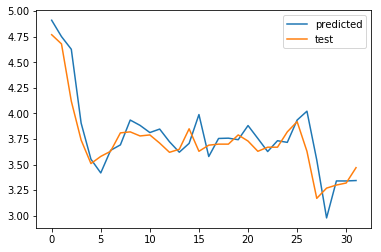

In [266]:

plot_predicted, = plt.plot(predicted, label='predicted')
plot_test, = plt.plot(y['test'], label='test')
plt.legend(handles=[plot_predicted, plot_test])
plt.show()



In [267]:
print(y['test'])

[[ 4.76881742]
 [ 4.67883968]
 [ 4.1189785 ]
 [ 3.7390728 ]
 [ 3.50912976]
 [ 3.57911229]
 [ 3.62910008]
 [ 3.80905533]
 [ 3.81905293]
 [ 3.77906275]
 [ 3.78906035]
 [ 3.70908022]
 [ 3.61910248]
 [ 3.64909506]
 [ 3.84904552]
 [ 3.62910008]
 [ 3.68908501]
 [ 3.69908261]
 [ 3.69908261]
 [ 3.78906035]
 [ 3.72907519]
 [ 3.62910008]
 [ 3.66909003]
 [ 3.66909003]
 [ 3.81905293]
 [ 3.91902804]
 [ 3.62910008]
 [ 3.16921401]
 [ 3.26918936]
 [ 3.2991817 ]
 [ 3.31917691]
 [ 3.46913958]]


In [268]:
print(predicted)

[ 4.91010141  4.75046206  4.62638283  3.90475059  3.55178118  3.41756296
  3.63838577  3.69180584  3.93455338  3.8825531   3.81220269  3.84627342
  3.72233891  3.62012148  3.70654178  3.98812175  3.57812619  3.75455356
  3.75739884  3.74244261  3.88069367  3.75446153  3.62661672  3.73254991
  3.71637869  3.93420839  4.0211544   3.54406762  2.97790313  3.33924317
  3.33915067  3.34324026]


In [269]:
r2_score(y['test'], predicted)

0.68840483462558144